# load and import

In [1]:
R.version.string
library('dplyr')

library('stringr')
library('tidyr')
library('ggplot2')

library(ggh4x)
# library(tidyverse)
# Load necessary libraries
# library(magick)
library(cowplot)
library(patchwork)
library(gridExtra)
library(png)
library(grid)

[1] "R version 4.3.1 (2023-06-16)"


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
map_id_name <- read.csv('../gene_table_and_other_scripts/bioMartR_Ath_all_genes_info_googled.csv')
map_id_name <- map_id_name %>% dplyr::rename('gene_name' = 'external_gene_name', 'gene_id' = 'ensembl_gene_id')
sample_n(map_id_name, 2)

gene_id,gene_name
<chr>,<chr>
AT1G14420,AT59
AT2G28660,ATHMP18


In [3]:
source('../gene_table_and_other_scripts/theme_Publication.R')

Registering fonts with R

aakar already registered with pdfFont().

Abyssinica SIL already registered with pdfFont().

Andale Mono already registered with pdfFont().

Ani already registered with pdfFont().

AnjaliOldLipi already registered with pdfFont().

Arial already registered with pdfFont().

Arial Black already registered with pdfFont().

Chandas already registered with pdfFont().

Comic Sans MS already registered with pdfFont().

Courier New already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Mono already registered with pdfFont().

DejaVu Serif already registered with pdfFont().

Dhurjati already registered with pdfFont().

Droid Sans Fallback already registered with pdfFont().

Dyuthi already registered with pdfFont().

FreeMono already registered with pdfFont().

FreeSans already registered with pdfFont().

FreeSerif already registered with pdfFont().

Gargi already registered with pdfFont().

Garuda already registered with pdfFont(

# GO terms

In [4]:
GO_ID_terms <-  readRDS('../Pathway_plot//Rdata/GO_ID_terms.rds')

In [5]:
JA <- GO_ID_terms %>% filter(GO_ID == 'GO:0009753', code != 'IEA') %>% select(AGI)

In [6]:
PCD <- GO_ID_terms %>% filter(GO_ID == 'GO:0012501', code != 'IEA') %>% select(AGI)

**<span style="color:red">### remove TIR  and P-loop, only have 2 AGI</span>**


# Pathways

In [7]:
updated_NLRs_table <- read.csv("../gene_table_and_other_scripts/Col-0_NLRs_167_Ya-Long_Donghui_20240321.csv") %>% 
    select(AGI, Primary.Gene.Symbol)

In [8]:
NLRs_and_TIRs <- read.csv(file = "../gene_table_and_other_scripts/NLRs_and_TIR_only.csv") 

In [9]:
Pathways_Ngou_2021 <- readxl::read_excel("../gene_table_and_other_scripts/Ngou_2021_Nature_figure2E_pathways_mod.xlsx")

In [10]:
Pathways <- Pathways_Ngou_2021 %>% dplyr::select(Target, GeneFamily)
Pathways <- Pathways %>%as.data.frame  %>% dplyr::rename('AGI' = 'Target')
LRRs <- Pathways %>% filter(GeneFamily %>% str_detect('LRR'))

In [11]:
LRRs

AGI,GeneFamily
<chr>,<chr>
AT1G51820,LRR-RLKs
AT2G19190,LRR-RLKs
AT1G17750,LRR-RLKs
AT1G55610,LRR-RLKs
AT1G51890,LRR-RLKs
AT1G74360,LRR-RLKs
AT1G73080,LRR-RLKs
AT3G13380,LRR-RLKs
AT1G56140,LRR-RLKs


## add GO terms

# Res

In [12]:
Res_adr1s <-  readRDS('../JC14_and_DMs/Rdata/Res_adr1.rds')
Res_3DM <-  readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds')
Res_3DM_and_adr1s <- Res_3DM  %>% rbind(Res_adr1s)

In [13]:
Res_3DM %>% dplyr::filter(source == 'DM6/DM7') %>% nrow

ERROR: [1m[33mError[39m in `dplyr::filter()`:[22m
[1m[22m[36mℹ[39m In argument: `source == "DM6/DM7"`.
[1mCaused by error in `source == "DM6/DM7"`:[22m
[33m![39m comparison (==) is possible only for atomic and list types


In [14]:
Res_3DM %>% filter(source == 'DM1/DM2d') %>% nrow

ERROR: [1m[33mError[39m in `filter()`:[22m
[1m[22m[36mℹ[39m In argument: `source == "DM1/DM2d"`.
[1mCaused by error in `source == "DM1/DM2d"`:[22m
[33m![39m comparison (==) is possible only for atomic and list types


In [ ]:
Res_3DM %>% filter(source == 'DM10/DM11')

In [15]:
Res_2DM <- Res_3DM %>% filter(contrast %>% str_detect('DM1/DM2d|DM6/DM7'))

In [16]:
Res_Pathogen <- readRDS('../RNA_seq_Pathogen/Rds_Rdata_hisat2//Res2023-04-21 15:54:40.rdata') %>% filter(Contrast %>% str_detect('Mock') ) %>%filter(Contrast %>% str_detect('Avr'))
Res_Pathogen <- Res_Pathogen %>% select(Gene, log2FoldChange, Contrast)  %>% dplyr::rename('source' = 'Contrast', 'AGI' = 'Gene')

In [17]:
Res_Pathogen %>% distinct()

AGI,log2FoldChange,source
<chr>,<dbl>,<chr>
AT1G30814,-0.829686864,AvrRpt2-6h_vs_Mock-6h
AT1G78930,-0.011894928,AvrRpt2-6h_vs_Mock-6h
AT1G71695,-0.098855557,AvrRpt2-6h_vs_Mock-6h
AT1G58983,0.083782797,AvrRpt2-6h_vs_Mock-6h
AT1G12980,-2.460711255,AvrRpt2-6h_vs_Mock-6h
AT1G56250,0.254901801,AvrRpt2-6h_vs_Mock-6h
AT1G69810,0.661998002,AvrRpt2-6h_vs_Mock-6h
AT1G72450,1.784604326,AvrRpt2-6h_vs_Mock-6h
AT1G76280,-0.340306572,AvrRpt2-6h_vs_Mock-6h


In [18]:
Res_adr1s <-  readRDS('../JC14_and_DMs/Rdata/Res_adr1.rds')
Res_adr1s <-  Res_adr1s %>% select(AGI, log2FoldChange, line) %>% dplyr::rename('source' = 'line')

Res_3DM <-  readRDS('../3DM_shoot/Rds_Rdata/Res_3DM.2023-04-21 14:05:06rds')
Res_3DM <- Res_3DM %>% select(AGI, log2FoldChange, line)%>% dplyr::rename('source' = 'line')

# Res_Pathogen <- readRDS('../RNA_seq_Pathogen/Rds_Rdata_hisat2//Res2023-04-21 15:54:40.rdata')
# Res_Pathogen <- Res_Pathogen %>% select(Gene, log2FoldChange, Contrast)  %>% dplyr::rename('source' = 'Contrast', 'AGI' = 'Gene')
# Res_Pathogen <- Res_Pathogen %>% filter( source %>% str_detect('control', negate = T) )# %>% pull(source) %>% unique

Res_combined <- Res_3DM %>% rbind(Res_Pathogen)  %>% rbind(Res_adr1s)
Res_combined <- Res_combined %>% dplyr::rename('log2FC' = 'log2FoldChange')
Res_combined <- Res_combined %>% mutate(source = source %>% str_remove('_vs_Mock-\\d{1,2}h$'))

In [19]:
Res_combined %>% pull(source) %>% unique

[1] "DM6/DM7"        "DM1/DM2d"       "DM10/DM11"      "AvrRpt2-6h"    
 [5] "AvrRpt2-12h"    "AvrRpt2-20h"    "AvrRps4-6h"     "AvrRps4-12h"   
 [9] "AvrRps4-20h"    "DM1/DM2d_adr1s" "DM6/DM7_adr1s"  "Col-0_adr1s"

In [20]:
Res_combined <- Res_combined %>% mutate(source = factor(source, levels = c('DM10/DM11','DM1/DM2d','DM1/DM2d_adr1s','DM6/DM7','DM6/DM7_adr1s','Col-0_adr1s','AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h')) )
Res_combined$source %>% unique

[1] DM6/DM7        DM1/DM2d       DM10/DM11      AvrRpt2-6h     AvrRpt2-12h   
 [6] AvrRpt2-20h    AvrRps4-6h     AvrRps4-12h    AvrRps4-20h    DM1/DM2d_adr1s
[11] DM6/DM7_adr1s  Col-0_adr1s   
12 Levels: DM10/DM11 DM1/DM2d DM1/DM2d_adr1s DM6/DM7 ... AvrRps4-20h

In [21]:
Res_combined %>% filter(AGI == 'AT1G65470') #FAS1

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT1G65470,-0.909521959,DM6/DM7
AT1G65470,-1.260462951,DM1/DM2d
AT1G65470,-0.789192308,DM10/DM11
AT1G65470,0.155244009,AvrRpt2-6h
AT1G65470,-0.199805350,AvrRpt2-12h
AT1G65470,-0.794718124,AvrRpt2-20h
AT1G65470,-0.002162313,AvrRps4-6h
AT1G65470,-0.335495515,AvrRps4-12h
AT1G65470,-0.871788163,AvrRps4-20h


In [22]:
Res_combined %>% filter(AGI == 'AT4G28190') #ULTRAPETALA1

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT4G28190,-1.75956574,DM6/DM7
AT4G28190,-3.28205988,DM1/DM2d
AT4G28190,-4.32677256,DM10/DM11
AT4G28190,-0.03125687,AvrRpt2-6h
AT4G28190,-0.86302899,AvrRpt2-12h
AT4G28190,-1.76873403,AvrRpt2-20h
AT4G28190,0.10068840,AvrRps4-6h
AT4G28190,-0.77326005,AvrRps4-12h
AT4G28190,-1.21296391,AvrRps4-20h


In [23]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67")

In [24]:
custom_colors <- c(
  "DM6/DM7" = "#F8766D", 'DM1/DM2d' = '#FB61D7', 'DM10/DM11' = '#A58AFF',
  'Col-0_12' = '#9ccf2d', 'Col-0_14' = '#00C094',
  'Tuescha-9' = '#07a822', 'Cdm-0' = '#00A9FF',
  "control" = "#72A063",
  "Mock-6h" = "#94B6CD", "Mock-12h" = "#6D9AB9", "Mock-20h" = "#4579A1", 
  # "AvrRps4-6h" = "#d5bae3", "AvrRps4-12h" = "#a57dba", "AvrRps4-20h" = "#C452B5", 
  # "AvrRpt2-6h" = "#e3c79a", "AvrRpt2-12h" = "#F2AB5C", "AvrRpt2-20h" = "#EE8237",
    "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#a884ba", "AvrRps4-20h" = "#cfa3e6", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#f09f67",
  'DM6/DM7_adr1s' = '#ffc14d', 'DM1/DM2d_adr1s' = '#2a6fdb', 'Col-0_adr1s' = '#ddacf5'
)

bar_colors <-  c("DM6/DM7 vs Col-0" = "#EDC5BF", 'DM1/DM2d vs Col-0' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s vs Col-0' = '#008DFA' , 'DM1/DM2d_adr1s vs Col-0' = '#008DFA', 
                 'Col-0_adr1s vs Col-0' = '#008DFA',
                 "DM6/DM7" = "#EDC5BF", 'DM1/DM2d' = '#C894B8', 
                                 'DM10/DM11' = '#D1CDE6', 
                   'DM6/DM7_adr1s' = '#008DFA' , 'DM1/DM2d_adr1s' = '#008DFA', 
                 'Col-0_adr1s' = '#008DFA',
                  "AvrRps4-6h" = "#dcc0eb", "AvrRps4-12h" = "#cfa3e6", "AvrRps4-20h" = "#a884ba", 
  "AvrRpt2-6h" = "#e8bea0", "AvrRpt2-12h" = "#f0b48b", "AvrRpt2-20h" = "#cf8655")

# Venn

In [25]:
NLRs_Res_3DM_and_adr1s <- Res_3DM_and_adr1s %>% right_join(NLRs_and_TIRs, by = 'AGI')

In [26]:
up_NLRs <- list(
  'DM6/DM7' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, log2FoldChange > 2, line == 'DM6/DM7', padj < 0.05) %>%
    arrange(desc(log2FoldChange)) %>% ##by default arrange is ascending
    pull(AGI),
  'DM1/DM2d' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, log2FoldChange > 2, line == 'DM1/DM2d', padj < 0.05) %>%
    arrange(desc(log2FoldChange)) %>% ##by default arrange is ascending
    pull(AGI),
  'DM10/DM11' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, log2FoldChange > 2, line == 'DM10/DM11', padj < 0.05) %>%
    arrange(desc(log2FoldChange)) %>% ##by default arrange is ascending
    pull(AGI),
  'DM1/DM2d_adr1s' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, line == 'DM1/DM2d_adr1s', padj < 0.05, log2FoldChange > 2) %>%
    arrange(desc(log2FoldChange)) %>%
    pull(AGI),
  'DM6/DM7_adr1s' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, line == 'DM6/DM7_adr1s', padj < 0.05, log2FoldChange > 2) %>%
    arrange(desc(log2FoldChange)) %>%
    pull(AGI),
  'Col-0_adr1s' = NLRs_Res_3DM_and_adr1s %>% filter(baseMean > 5, line == 'Col-0_adr1s', padj < 0.05, log2FoldChange > 2) %>%
    arrange(desc(log2FoldChange)) %>%
    pull(AGI)
    
)
up_NLRs

$`DM6/DM7`
 [1] "AT4G23515" "AT5G44900" "AT5G38344" "AT4G11170" "AT4G27220" "AT5G44920"
 [7] "AT3G04220" "AT5G45000" "AT5G38350" "AT5G45090" "AT1G72860" "AT2G17050"
[13] "AT1G17615" "AT2G20142" "AT3G25510" "AT1G58390" "AT5G18350" "AT5G44910"
[19] "AT5G41750" "AT1G59780" "AT3G44400" "AT4G23510" "AT2G17060" "AT5G38340"
[25] "AT5G45070" "AT1G65850" "AT2G16870" "AT4G14370" "AT2G32140" "AT5G41550"
[31] "AT5G46260" "AT4G33300" "AT5G18360" "AT1G57650" "AT1G72950" "AT1G72900"
[37] "AT1G12290" "AT5G05400" "AT1G15890" "AT1G33560"

$`DM1/DM2d`
 [1] "AT4G19925" "AT1G17615" "AT5G38350" "AT5G38344" "AT1G57650" "AT5G18350"
 [7] "AT4G11340" "AT4G16920" "AT5G45090" "AT4G11170" "AT5G45000" "AT5G45070"
[13] "AT3G14470" "AT2G32140" "AT2G20142" "AT5G41750" "AT4G27220" "AT1G72890"
[19] "AT5G41550" "AT3G04220" "AT5G45080" "AT1G66090" "AT3G14460" "AT4G14370"
[25] "AT4G08450" "AT5G38340" "AT1G52900" "AT5G58120" "AT3G44400" "AT5G46520"
[31] "AT2G16870" "AT1G72950" "AT5G41740" "AT1G17600" "AT1G58390" "AT1G31540"
[37] "AT1G33560" "AT5G66910" "AT5G44510" "AT1G12290" "AT1G17610" "AT3G25510"
[43] "AT4G33300" "AT5G46490" "AT1G72900" "AT1G65850" "AT5G45440" "AT1G72870"
[49] "AT5G04720" "AT5G18370"

$`DM10/DM11`
 [1] "AT4G19925" "AT4G11340" "AT1G17615" "AT1G57650" "AT1G66090" "AT3G25510"
 [7] "AT5G38350" "AT4G11170" "AT5G18350" "AT1G52900" "AT5G45000" "AT2G20142"
[13] "AT2G32140" "AT4G14370" "AT5G38344" "AT1G64070" "AT4G27220" "AT5G41750"
[19] "AT1G17610" "AT5G41740" "AT1G72900" "AT1G72890" "AT4G19520" "AT3G04220"
[25] "AT5G38340" "AT4G23510" "AT1G72930" "AT4G33300" "AT4G08450" "AT1G51270"
[31] "AT5G51630" "AT1G65850" "AT1G33560" "AT1G72920" "AT1G31540" "AT1G12290"
[37] "AT1G72910" "AT4G23515" "AT1G17600" "AT3G44400" "AT3G14470" "AT5G04720"
[43] "AT3G44630" "AT5G41550" "AT3G14460" "AT1G58390" "AT1G72940" "AT5G46520"
[49] "AT3G51560" "AT5G66910" "AT1G47370" "AT1G63750" "AT1G56520" "AT3G44480"
[55] "AT5G44920" "AT4G36150" "AT1G63870" "AT5G45440" "AT5G18370" "AT5G18360"
[61] "AT1G72950" "AT5G48780" "AT5G58120" "AT1G59620" "AT4G16960" "AT3G44670"
[67] "AT1G56510" "AT3G50950" "AT3G04210" "AT4G16890" "AT5G46510" "AT5G46490"
[73] "AT2G16870" "AT2G17050" "AT2G14080"

$`DM1/DM2d_adr1s`
 [1] "AT1G17615" "AT5G38350" "AT1G57630" "AT1G57650" "AT5G45090" "AT4G19925"
 [7] "AT1G17610" "AT4G11170" "AT5G41750" "AT2G32140" "AT4G11340" "AT5G38344"
[13] "AT2G20142" "AT5G45000" "AT3G04220" "AT4G14370" "AT5G41550" "AT3G25510"
[19] "AT1G66090" "AT1G33560" "AT1G58390" "AT2G16870" "AT1G72900"

$`DM6/DM7_adr1s`
 [1] "AT4G27220" "AT1G58390" "AT5G45090" "AT4G11170" "AT5G45000" "AT1G57650"
 [7] "AT5G44920" "AT5G41750" "AT4G14370" "AT5G38340" "AT3G25510"

$`Col-0_adr1s`
[1] "AT5G58120" "AT1G50180" "AT5G44510"

In [27]:
library(VennDiagram)
futile.logger::flog.threshold(futile.logger::ERROR, name = "VennDiagramLogger") ##suppress the log file 

Loading required package: futile.logger



NULL

In [28]:
Res_3DM_and_adr1s

AGI,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tissue,line,contrast,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AT1G30814,30.3735985,5.18459620,1.1880403,4.36399006,1.277114e-05,5.457536e-05,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G30814
AT1G78930,229.5290030,0.01991274,0.2313721,0.08606374,9.314157e-01,9.797915e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G78930
AT1G71695,4279.2158462,-2.30890364,0.3467650,-6.65841044,2.768049e-11,3.119551e-10,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G71695
AT1G58983,160.5416134,-0.17951020,0.9294748,-0.19313078,8.468565e-01,9.160421e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G58983
AT1G12980,5.5871965,2.27948272,1.4560934,1.56547838,1.174708e-01,1.894272e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,ESR1
AT1G56250,66.5033746,0.77412597,0.7988443,0.96905738,3.325166e-01,4.458052e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,PP2-B14
AT1G66852,0.2392222,0.00000000,6.5584380,0.00000000,1.000000e+00,NA,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,AT1G66852
AT1G69810,174.6157257,2.76176191,0.6470886,4.26798103,1.972501e-05,8.109245e-05,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,WRKY36
AT1G72450,2731.0180974,-0.41945456,0.3845236,-1.09084205,2.753424e-01,3.826846e-01,Shoot,DM6/DM7,DM6/DM7_vs_Col-0_14,JAZ6


# Bar plot of NLRs

In [29]:
Res_combined %>% filter(AGI  == 'AT4G14390')

AGI,log2FC,source
<chr>,<dbl>,<fct>
AT4G14390,6.35565974,DM6/DM7
AT4G14390,8.05872953,DM1/DM2d
AT4G14390,8.98735730,DM10/DM11
AT4G14390,0.04927757,AvrRpt2-6h
AT4G14390,0.00000000,AvrRpt2-12h
AT4G14390,0.17014255,AvrRpt2-20h
AT4G14390,0.06511173,AvrRps4-6h
AT4G14390,3.58068134,AvrRps4-12h
AT4G14390,1.63150265,AvrRps4-20h


In [30]:
library(glue)
library(ggtext)

In [31]:
options(repr.plot.width=8, repr.plot.height=4)
cols_text <- c( 'TIR-NBS-LRR' =  "#386cb0",
          'TIR'= "#a6cee3", "TIR-NBS" = "#2581ba",
          
          "CC-NBS-LRR" = "#fdb462",'CC-NBS' =  "#fb9a99", 'RPW8-NBS-LRR' = "#984ea3",
          
          'NBS-LRR' = "#b3b330", 
          'P-loop' = "#7fc97f"
         )

# show_col(cols_text, ncol = 6)
# cols_text
cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% rename(label_color = 2)

In [32]:
Res_NLRs <- Res_combined %>% right_join(NLRs_and_TIRs, by = 'AGI')

In [33]:
Res_NLRs

AGI,log2FC,source,Class,Symbol,Organization
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>
AT1G56540,0.73768310,DM6/DM7,TIR-NBS-LRR,AT1G56540,clustered
AT1G63360,0.09548923,DM6/DM7,CC-NBS-LRR,AT1G63360,clustered
AT1G53350,0.74051156,DM6/DM7,CC-NBS-LRR,AT1G53350,NA
AT1G58848,1.66607221,DM6/DM7,CC-NBS-LRR,AT1G58848,NA
AT1G63880,0.90581650,DM6/DM7,TIR-NBS-LRR,AT1G63880,clustered
AT1G61300,-1.09160953,DM6/DM7,NBS-LRR,AT1G61300,clustered
AT1G63740,0.81169961,DM6/DM7,TIR-NBS-LRR,AT1G63740,clustered
AT1G27170,0.35303205,DM6/DM7,TIR-NBS-LRR,AT1G27170,clustered
AT1G31540,1.20302747,DM6/DM7,TIR-NBS-LRR,AT1G31540,singleton


In [34]:
Res_NLRs <- Res_NLRs %>% 
    mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    left_join(cols_text_2, by = 'Class')  

In [35]:
Res_NLRs

AGI,log2FC,source,Class,Symbol,Organization,plot_label,label_color
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>
AT1G56540,0.73768310,DM6/DM7,TIR-NBS-LRR,AT1G56540,clustered,AT1G56540,#386cb0
AT1G63360,0.09548923,DM6/DM7,CC-NBS-LRR,AT1G63360,clustered,AT1G63360,#fdb462
AT1G53350,0.74051156,DM6/DM7,CC-NBS-LRR,AT1G53350,NA,AT1G53350,#fdb462
AT1G58848,1.66607221,DM6/DM7,CC-NBS-LRR,AT1G58848,NA,AT1G58848,#fdb462
AT1G63880,0.90581650,DM6/DM7,TIR-NBS-LRR,AT1G63880,clustered,AT1G63880,#386cb0
AT1G61300,-1.09160953,DM6/DM7,NBS-LRR,AT1G61300,clustered,AT1G61300,#b3b330
AT1G63740,0.81169961,DM6/DM7,TIR-NBS-LRR,AT1G63740,clustered,AT1G63740,#386cb0
AT1G27170,0.35303205,DM6/DM7,TIR-NBS-LRR,AT1G27170,clustered,AT1G27170,#386cb0
AT1G31540,1.20302747,DM6/DM7,TIR-NBS-LRR,AT1G31540,singleton,AT1G31540,#386cb0


In [36]:
# Extract plot_label and label_color from Res_NLRs_up
plot_label_color <- Res_NLRs %>% select(plot_label, label_color)

# Create a named list with label_color as content and plot_label as names
color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)


In [37]:
Res_NLRs_color <- Res_NLRs %>% mutate(label_color_markdown =
        glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 


In [38]:
Res_NLRs_color

AGI,log2FC,source,Class,Symbol,Organization,plot_label,label_color,label_color_markdown
<chr>,<dbl>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>
AT1G56540,0.73768310,DM6/DM7,TIR-NBS-LRR,AT1G56540,clustered,AT1G56540,#386cb0,<i style='color: #386cb0'>AT1G56540</i>
AT1G63360,0.09548923,DM6/DM7,CC-NBS-LRR,AT1G63360,clustered,AT1G63360,#fdb462,<i style='color: #fdb462'>AT1G63360</i>
AT1G53350,0.74051156,DM6/DM7,CC-NBS-LRR,AT1G53350,NA,AT1G53350,#fdb462,<i style='color: #fdb462'>AT1G53350</i>
AT1G58848,1.66607221,DM6/DM7,CC-NBS-LRR,AT1G58848,NA,AT1G58848,#fdb462,<i style='color: #fdb462'>AT1G58848</i>
AT1G63880,0.90581650,DM6/DM7,TIR-NBS-LRR,AT1G63880,clustered,AT1G63880,#386cb0,<i style='color: #386cb0'>AT1G63880</i>
AT1G61300,-1.09160953,DM6/DM7,NBS-LRR,AT1G61300,clustered,AT1G61300,#b3b330,<i style='color: #b3b330'>AT1G61300</i>
AT1G63740,0.81169961,DM6/DM7,TIR-NBS-LRR,AT1G63740,clustered,AT1G63740,#386cb0,<i style='color: #386cb0'>AT1G63740</i>
AT1G27170,0.35303205,DM6/DM7,TIR-NBS-LRR,AT1G27170,clustered,AT1G27170,#386cb0,<i style='color: #386cb0'>AT1G27170</i>
AT1G31540,1.20302747,DM6/DM7,TIR-NBS-LRR,AT1G31540,singleton,AT1G31540,#386cb0,<i style='color: #386cb0'>AT1G31540</i>


<i style='color: #386cb0'>AT1G65850</i>

<i style='color: green'>the idea here is that pre set order x = reorder(label_color_markdown, log2FoldChange) is not preserved, I have to plot 3 geom_bar first, then put the hundreds layers of each NLRs geom_bar over it. </i>

In [39]:
Res_NLRs_color %>% pull(AGI) %>% unique %>% length

[1] 197

In [40]:
Res_NLRs_color %>% pull(AGI) %>% unique %>% length

[1] 197

In [41]:
keep_NLRs <-  c (Res_NLRs_color %>% filter(abs(log2FC) > 2) %>% pull(AGI) %>% unique(),
                 'AT5G66900') #add nrg1.1

In [42]:
Res_NLRs_color <- Res_NLRs_color %>% dplyr::filter(AGI %in% keep_NLRs )
Res_NLRs_color <- Res_NLRs_color %>% arrange(desc(log2FC))

In [43]:
Res_NLRs_color <- Res_NLRs_color %>% mutate(category = source %>% str_remove('_adr1s') %>% str_remove('-\\d{1,2}h$'))

In [44]:
each_NLR_max_log2FC <- Res_NLRs_color %>% group_by(AGI) %>% slice_head(n=1) %>% ungroup %>% arrange(desc(log2FC))

In [45]:
each_NLR_Col_log2FC <- Res_NLRs_color %>% filter(source == 'Col-0_adr1s' ) %>%
     arrange(desc(log2FC))

In [46]:
Res_NLRs_color <- Res_NLRs_color %>% mutate(source = source %>% str_replace('DM6/DM7$', 'DM6/DM7 vs Col-0') %>%
        str_replace('DM6/DM7_adr1s', 'DM6/DM7_adr1s vs Col-0') %>%
        str_replace('DM1/DM2d$', 'DM1/DM2d vs Col-0') %>% str_replace('DM1/DM2d_adr1s', 'DM1/DM2d_adr1s vs Col-0') %>%
        str_replace('Col-0_adr1s', 'Col-0_adr1s vs Col-0')
                         )

In [127]:
Res_NLRs_color %>% sample_n(10)

AGI,log2FC,source,Class,Symbol,Organization,plot_label,label_color,label_color_markdown,category
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>,<chr>
AT1G09665,-3.8400927,DM1/DM2d vs Col-0,TIR,AT1G09665,NA,AT1G09665,#a6cee3,<i style='color: #a6cee3'>AT1G09665</i>,DM1/DM2d
AT5G46260,1.8032929,DM1/DM2d_adr1s vs Col-0,TIR-NBS-LRR,AT5G46260,clustered,AT5G46260,#386cb0,<i style='color: #386cb0'>AT5G46260</i>,DM1/DM2d
AT1G12290,0.7586908,DM6/DM7_adr1s vs Col-0,CC-NBS-LRR,L5,clustered,L5_AT1G12290,#fdb462,<i style='color: #fdb462'>L5_AT1G12290</i>,DM6/DM7
AT1G62630,0.2019105,Col-0_adr1s vs Col-0,CC-NBS-LRR,AT1G62630,singleton,AT1G62630,#fdb462,<i style='color: #fdb462'>AT1G62630</i>,Col-0
AT5G58120,2.4010501,DM10/DM11,TIR-NBS-LRR,DM10,singleton,DM10_AT5G58120,#386cb0,<i style='color: #386cb0'>DM10_AT5G58120</i>,DM10/DM11
AT4G36150,0.8942393,DM1/DM2d_adr1s vs Col-0,TIR-NBS-LRR,SADR1,clustered,SADR1_AT4G36150,#386cb0,<i style='color: #386cb0'>SADR1_AT4G36150</i>,DM1/DM2d
AT3G44400,2.2711343,AvrRps4-20h,TIR-NBS-LRR,AT3G44400,clustered,AT3G44400,#386cb0,<i style='color: #386cb0'>AT3G44400</i>,AvrRps4
AT5G44910,0.7425956,AvrRpt2-20h,TIR,AT5G44910,NA,AT5G44910,#a6cee3,<i style='color: #a6cee3'>AT5G44910</i>,AvrRpt2
AT5G18370,0.3872994,AvrRpt2-20h,TIR-NBS-LRR,DSC2,clustered,DSC2_AT5G18370,#386cb0,<i style='color: #386cb0'>DSC2_AT5G18370</i>,AvrRpt2


In [47]:
options(repr.plot.width=8.4, repr.plot.height=6, repr.plot.res = 50)


plot_NLRs_overlay_bar <- function(Res = Res_NLRs_color, Res_base = each_NLR_Col_log2FC,  alpha = 0.6, facet_row = "Class", facet_col = "category") {
  library(purrr)
  library(rlang) # for sym()

  # Convert facet strings to symbols
  facet_row <- sym(facet_row)
  facet_col <- sym(facet_col)
  
  # Step 1: Split the dataframe based on log2FoldChange
  over0 <- Res %>% filter(log2FC > 0) 
  below0 <- Res %>% filter(log2FC <= 0)

  # Step 2: Create a list to store the dataframes for each layer
  layers <- list()

  # Step 3: Iterate until there are no rows left in over0 and below0
  layer_num <- 1
  while (nrow(over0) > 0 || nrow(below0) > 0) {
    max_over0 <- over0 %>% group_by( AGI) %>% slice_max(log2FC)
    min_below0 <- below0 %>% group_by( AGI) %>% slice_min(log2FC)

    over0 <- suppressMessages(anti_join(over0, max_over0))
    below0 <- suppressMessages(anti_join(below0, min_below0))

    layer <- bind_rows(max_over0, min_below0)
    layers[[layer_num]] <- layer

    layer_num <- layer_num + 1
  }

  # Step 4: Use the layers list to add new layers to the ggplot using geom_bar
  bar_NLRs_base <- Res %>%
    ggplot(aes(x = reorder(label_color_markdown, log2FC), y = log2FC, label = label_color_markdown)) +
    labs(y = "Log2 FoldChange") +
    coord_flip() +
    guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
    scale_y_continuous(breaks = c(-8,-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16),
                       expand = c(0, 0)) +
    scale_fill_manual(values = bar_colors)+
    theme_Publication() +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 8),
          axis.title.y = element_blank()) +
    theme(text = element_text(size = 8, family = "Arial"), 
          strip.text = element_text(size = 12)) +
    facet_grid(rows = vars(!!facet_row), cols = vars(!!facet_col), scales = "free", space = "free") + # use !! to evaluate symbols
    theme(axis.text.y = element_markdown())   +
    geom_bar(data = Res_base,
                 position="identity", stat='identity', aes(fill=source), width = .8,  alpha = 0 ) 

  bar_NLRs <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               aes(fill = source),
               width = .8,
               alpha = alpha)
  }, .init = bar_NLRs_base)
  bar_NLRs <- bar_NLRs + geom_hline(yintercept=0,  color = "black", size=0.5)
  # Return the final plot
  return(bar_NLRs)
}



In [48]:
NLRs_in_connectivity_table <- read.csv('./WGCNA_output_all/NLRs_and_TIRs_connectivity_table_info.csv') 

In [49]:
NLRs_in_connectivity_table %>% group_by(module) %>% summarise(count = n())

module,count
<chr>,<int>
MEblue,1
MEcyan,37
MEdarkgreen,1
MEgreenyellow,7
MEmidnightblue,1
MEpurple,2
MEsalmon,9


In [50]:
Res_NLRs_in_connectivity_table <- NLRs_in_connectivity_table %>% dplyr::rename('AGI' = 'gene') %>% 
    left_join(Res_NLRs_color, by = 'AGI') %>% filter(category != 'DM10/DM11') %>% distinct

In [51]:
Res_NLRs_in_connectivity_table <- Res_NLRs_in_connectivity_table %>% mutate(module = factor(module, levels = c('MEblue','MEpurple','MEdarkturquoise',   'MEcyan','MEdarkred',
            'MEgreenyellow','MEsalmon','MEtan','MEdarkgreen','MEmidnightblue') %>% rev()))

In [52]:
Res_NLRs_in_connectivity_table_Col <- Res_NLRs_in_connectivity_table %>% 
        filter(source == 'Col-0_adr1s vs Col-0' ) %>% arrange(desc(log2FC))

In [53]:
Res_NLRs_in_connectivity_table %>% saveRDS('./Rdata/Res_NLRs_in_connectivity_table.rds')


In [54]:
Res_NLRs_in_connectivity_table %>% pull(AGI) %>% unique() %>% length

[1] 46

In [128]:
Res_NLRs_in_connectivity_table  %>% sample_n(10)

AGI,connectivity_rowSums_adj,module,gene_name,DM6.DM7,DM1.DM2d,DM10.DM11,AvrRpt2.6h,AvrRpt2.12h,AvrRpt2.20h,⋯,Organization.x,log2FC,source,Class,Symbol.y,Organization.y,plot_label,label_color,label_color_markdown,category
<chr>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>,<chr>
AT5G58120,1375.21741,MEcyan,DM10,0.3181805,3.5866719,2.4010501,0.08107542,0.4235517,0.9521088,⋯,singleton,0.08107542,AvrRpt2-6h,TIR-NBS-LRR,DM10,singleton,DM10_AT5G58120,#386cb0,<i style='color: #386cb0'>DM10_AT5G58120</i>,AvrRpt2
AT3G44670,50.10345,MEsalmon,DM2H,0.9654017,1.8903192,2.3318712,-0.10742080,0.2150359,0.5246464,⋯,clustered,1.39254081,Col-0_adr1s vs Col-0,TIR-NBS-LRR,DM2H,clustered,DM2H_AT3G44670,#386cb0,<i style='color: #386cb0'>DM2H_AT3G44670</i>,Col-0
AT5G41750,1751.61197,MEcyan,AT5G41750,3.2906583,4.9633472,6.3667409,0.97032908,2.2414863,4.3694889,⋯,clustered,3.29065834,DM6/DM7 vs Col-0,TIR-NBS-LRR,DM1,clustered,DM1_AT5G41750,#386cb0,<i style='color: #386cb0'>DM1_AT5G41750</i>,DM6/DM7
AT1G61300,155.98046,MEpurple,AT1G61300,-1.0916095,-2.3601188,0.6682830,-0.43960523,-0.7272392,-2.1359826,⋯,clustered,-0.76790553,AvrRps4-12h,NBS-LRR,AT1G61300,clustered,AT1G61300,#b3b330,<i style='color: #b3b330'>AT1G61300</i>,AvrRps4
AT1G66090,1767.94932,MEcyan,TN3,1.3284499,3.8605274,9.5641445,0.87817998,2.3994573,4.2913824,⋯,singleton,2.39945727,AvrRpt2-12h,TIR-NBS,TN3,singleton,TN3_AT1G66090,#2581ba,<i style='color: #2581ba'>TN3_AT1G66090</i>,AvrRpt2
AT3G25510,1475.67738,MEcyan,AT3G25510,3.6183038,2.8520506,9.4520695,-0.53303339,0.9644500,1.0494693,⋯,singleton,-2.60776166,Col-0_adr1s vs Col-0,TIR-NBS-LRR,AT3G25510,singleton,AT3G25510,#386cb0,<i style='color: #386cb0'>AT3G25510</i>,Col-0
AT1G15890,62.05399,MEgreenyellow,AT1G15890,2.0938425,1.3562270,0.0000000,0.24579135,1.0299172,2.0275374,⋯,NA,2.09384248,DM6/DM7 vs Col-0,CC-NBS-LRR,AT1G15890,NA,AT1G15890,#fdb462,<i style='color: #fdb462'>AT1G15890</i>,DM6/DM7
AT5G46490,49.18666,MEsalmon,AT5G46490,0.3102710,2.7256352,2.1322655,-0.16347756,0.1470097,0.6627965,⋯,clustered,0.59387863,Col-0_adr1s vs Col-0,TIR-NBS-LRR,AT5G46490,clustered,AT5G46490,#386cb0,<i style='color: #386cb0'>AT5G46490</i>,Col-0
AT5G44910,1301.72508,MEcyan,AT5G44910,3.4535841,-0.1623432,0.9860415,0.50202879,0.9390817,0.7425956,⋯,NA,0.93908175,AvrRpt2-12h,TIR,AT5G44910,NA,AT5G44910,#a6cee3,<i style='color: #a6cee3'>AT5G44910</i>,AvrRpt2



Attaching package: ‘purrr’


The following object is masked from ‘package:scales’:

    discard



Attaching package: ‘rlang’


The following objects are masked from ‘package:purrr’:

    %@%, flatten, flatten_chr, flatten_dbl, flatten_int, flatten_lgl,
    flatten_raw, invoke, splice



Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


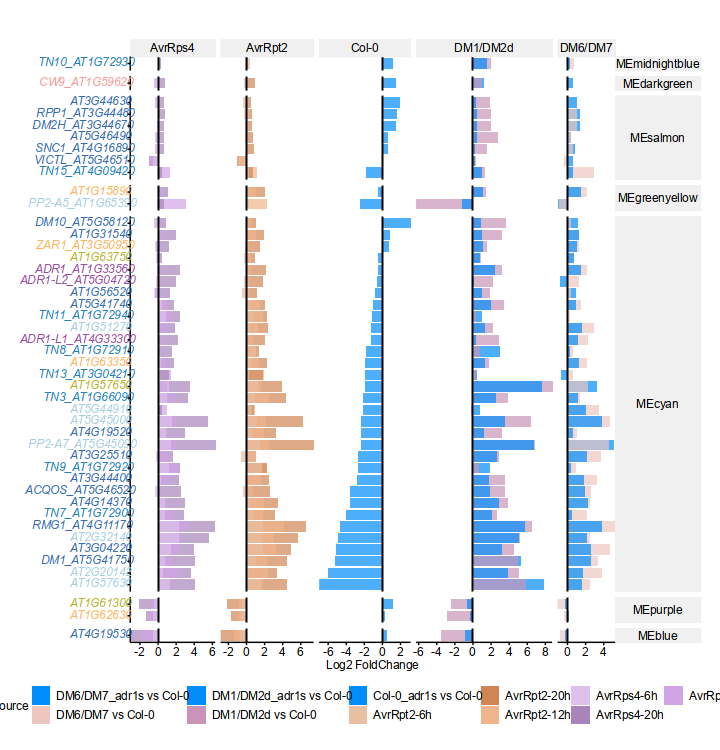

In [56]:


theme_custom <- function() {
  theme(
    text = element_text(family = "Arial", size = 8, face = "plain"),  # Set face = "plain" for all text
    axis.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for axis titles
    axis.text = element_text(family = "Arial", size = 8, face = "plain"),   # Overrides for axis text
    legend.title = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend titles
    legend.text = element_text(family = "Arial", size = 8, face = "plain"),  # Overrides for legend text
    strip.text.x = element_text(family = "Arial", size = 8, face = "plain"),  # Specific adjustment for x facet label
    strip.text.y = element_text(family = "Arial", size = 8, angle = 0, face = "plain")  # Specific adjustment for y facet label
  )
}



width_ = 7.2
height_ = 7.5
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 100)

bar_NLRs_plot <- plot_NLRs_overlay_bar(Res = Res_NLRs_in_connectivity_table , 
                      Res_base = Res_NLRs_in_connectivity_table_Col, 
                      facet_row = "module", alpha = 0.7) + 
                theme( strip.text.y = element_text(angle = 0)) + theme_custom() # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_NLRs_plot
bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_NLRs", Sys.time(), ".pdf"),
                         width = width_ , height = height_)
# bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_NLRs", Sys.time(), ".png"), width = 14 , height = 10)

In [57]:
Res_NLRs_in_connectivity_table_Col 

AGI,connectivity_rowSums_adj,module,gene_name,DM6.DM7,DM1.DM2d,DM10.DM11,AvrRpt2.6h,AvrRpt2.12h,AvrRpt2.20h,⋯,Organization.x,log2FC,source,Class,Symbol.y,Organization.y,plot_label,label_color,label_color_markdown,category
<chr>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>,<chr>
AT5G58120,1375.21741,MEcyan,DM10,0.31818045,3.5866719,2.40105011,0.081075418,0.42355172,0.952108806,⋯,singleton,3.1069551,Col-0_adr1s vs Col-0,TIR-NBS-LRR,DM10,singleton,DM10_AT5G58120,#386cb0,<i style='color: #386cb0'>DM10_AT5G58120</i>,Col-0
AT3G44630,48.90784,MEsalmon,AT3G44630,0.02392061,1.8367853,3.47824693,-0.327643786,0.11048393,0.435229471,⋯,clustered,1.8568878,Col-0_adr1s vs Col-0,TIR-NBS-LRR,AT3G44630,clustered,AT3G44630,#386cb0,<i style='color: #386cb0'>AT3G44630</i>,Col-0
AT3G44480,48.77329,MEsalmon,RPP1,1.01622370,1.8893832,2.65866175,-0.194139528,0.28771092,0.576680357,⋯,clustered,1.5547539,Col-0_adr1s vs Col-0,TIR-NBS-LRR,RPP1,clustered,RPP1_AT3G44480,#386cb0,<i style='color: #386cb0'>RPP1_AT3G44480</i>,Col-0
AT1G59620,60.12342,MEdarkgreen,CW9,-0.11237554,0.9598350,2.34839318,-0.240036638,0.04497619,0.860011477,⋯,singleton,1.3985193,Col-0_adr1s vs Col-0,CC-NBS,CW9,singleton,CW9_AT1G59620,#fb9a99,<i style='color: #fb9a99'>CW9_AT1G59620</i>,Col-0
AT3G44670,50.10345,MEsalmon,DM2H,0.96540165,1.8903192,2.33187121,-0.107420799,0.21503591,0.524646381,⋯,clustered,1.3925408,Col-0_adr1s vs Col-0,TIR-NBS-LRR,DM2H,clustered,DM2H_AT3G44670,#386cb0,<i style='color: #386cb0'>DM2H_AT3G44670</i>,Col-0
AT1G61300,155.98046,MEpurple,AT1G61300,-1.09160953,-2.3601188,0.66828303,-0.439605228,-0.72723920,-2.135982602,⋯,clustered,1.1500763,Col-0_adr1s vs Col-0,NBS-LRR,AT1G61300,clustered,AT1G61300,#b3b330,<i style='color: #b3b330'>AT1G61300</i>,Col-0
AT1G72930,44.93571,MEmidnightblue,TIR,0.69403797,1.9517556,4.30441513,0.295255850,0.15403721,0.125744391,⋯,singleton,1.0920878,Col-0_adr1s vs Col-0,TIR-NBS,TN10,singleton,TN10_AT1G72930,#2581ba,<i style='color: #2581ba'>TN10_AT1G72930</i>,Col-0
AT1G31540,1707.36526,MEcyan,AT1G31540,1.20302747,3.1840261,3.78599352,0.037789333,0.95477128,1.839985626,⋯,singleton,0.7550812,Col-0_adr1s vs Col-0,TIR-NBS-LRR,AT1G31540,singleton,AT1G31540,#386cb0,<i style='color: #386cb0'>AT1G31540</i>,Col-0
AT3G50950,1470.25873,MEcyan,ZAR1,1.16237288,1.4723998,2.23912347,-0.131057207,0.20146464,1.414576845,⋯,singleton,0.7051683,Col-0_adr1s vs Col-0,CC-NBS-LRR,ZAR1,singleton,ZAR1_AT3G50950,#fdb462,<i style='color: #fdb462'>ZAR1_AT3G50950</i>,Col-0


### ADR1s helps to maintain a basal level of NLRs in WT non-challenged state, 

In [58]:
LRRs_connectivity_table_info <- read.csv('./WGCNA_output_all/LRRs_connectivity_table_info.csv') 

In [59]:
LRRs_connectivity_table_info

gene,connectivity_rowSums_adj,module,gene_name,DM6.DM7,DM1.DM2d,DM10.DM11,AvrRpt2.6h,AvrRpt2.12h,AvrRpt2.20h,AvrRps4.6h,AvrRps4.12h,AvrRps4.20h,DM1.DM2d_adr1s,Col.0_adr1s,DM6.DM7_adr1s,GeneFamily
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AT5G25930,1941.522,MEcyan,HSL3,2.4517477,2.5157121,6.648904,0.503469393,1.7310892,3.317968,0.68131307,1.0957289,2.5383976,2.3958149,-1.8584397,1.611108567,LRR-RLKs
AT3G05360,1938.475,MEcyan,RLP30,2.1669162,2.7829493,5.242054,0.407941839,1.4279825,2.615108,0.51704653,1.0851877,2.3260854,0.7981202,-2.6890527,0.591159973,LRR-RLPs
AT1G51890,1921.279,MEcyan,AT1G51890,4.5212722,5.8842197,9.403041,0.885965436,2.1469454,4.951101,0.89596661,1.6262166,4.0297651,4.3062794,-1.2377279,3.660608138,LRR-RLKs
AT1G74360,1920.082,MEcyan,NILR1,2.5170643,4.2991020,6.446228,0.598334437,1.2660614,3.642734,0.42640405,0.5797205,2.7557154,1.6579608,-1.0247750,2.266635452,LRR-RLKs
AT1G09970,1895.984,MEcyan,LRR XI-23,1.2204412,0.9455815,3.247476,0.246158723,1.3719492,2.282596,0.36096260,1.1646397,2.0213936,1.1116915,-1.6672064,0.258854036,LRR-RLKs
AT3G28450,1888.441,MEcyan,BIR2,0.9917828,1.5470504,2.516384,0.267763276,0.8527711,1.521222,0.21115988,0.5674277,1.0046885,0.5294911,-0.2487409,0.299517913,LRR-RLKs
AT5G25910,1880.535,MEcyan,RLP52,3.7103483,4.6800397,8.127892,0.458528543,2.2491659,3.815673,0.49417587,1.7996160,3.3431985,3.2955829,-1.9635264,2.193874365,LRR-RLPs
AT4G39270,1873.885,MEcyan,AT4G39270,0.8088043,1.7906989,2.284062,0.454848452,0.8805827,1.437827,0.50260873,0.8145718,1.0048426,0.4967383,-0.3349904,0.248490069,LRR-RLKs
AT2G25440,1868.130,MEcyan,RLP20,4.3271684,6.7028713,10.744415,1.010885237,2.1837635,5.183031,0.94723352,1.6317996,5.2768613,8.8605144,-0.8404752,3.281833831,LRR-RLPs


In [60]:
LRRs_connectivity_table_info %>% filter( GeneFamily == 'LRR-RLKs') %>% group_by(module) %>% summarise(n = n())

module,n
<chr>,<int>
MEblue,54
MEcyan,32
MEdarkgreen,1
MEgreenyellow,1


In [61]:
LRRs_connectivity_table_info %>% filter( GeneFamily == 'LRR-RLPs') %>% group_by(module) %>% summarise(n = n())

module,n
<chr>,<int>
MEblue,2
MEcyan,10
MEmidnightblue,3


In [62]:
Res_LRRs <- Res_combined %>% left_join(map_id_name, by = c('AGI' = 'gene_id')) %>%
    mutate(label_color_markdown = paste0(gene_name, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
    right_join(LRRs_connectivity_table_info, by = c('AGI'= 'gene')) %>% mutate(category = source %>% str_remove('_adr1s') %>% str_remove('-\\d{1,2}h$')) %>% filter(category != 'DM10/DM11')

In [63]:
Res_LRRs <- Res_LRRs %>% mutate(module = factor(module, levels = c('MEblue','MEpurple','MEdarkturquoise',   'MEcyan','MEdarkred',
            'MEgreenyellow','MEsalmon','MEtan','MEdarkgreen','MEmidnightblue') %>% rev()))

In [64]:
Res_LRRs_Col <- Res_LRRs %>% filter(source == 'Col-0_adr1s' ) %>%
     arrange(desc(log2FC))

In [65]:
Res_LRRs 

AGI,log2FC,source,gene_name.x,label_color_markdown,connectivity_rowSums_adj,module,gene_name.y,DM6.DM7,DM1.DM2d,⋯,AvrRpt2.12h,AvrRpt2.20h,AvrRps4.6h,AvrRps4.12h,AvrRps4.20h,DM1.DM2d_adr1s,Col.0_adr1s,DM6.DM7_adr1s,GeneFamily,category
<chr>,<dbl>,<fct>,<chr>,<chr>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
AT1G66150,-0.2256852,DM6/DM7,TMK1,TMK1_AT1G66150,1563.874,MEblue,TMK1,-0.2256852,-0.05557571,⋯,-0.5310377,-0.8260468,-0.24220414,-0.75362668,-1.0928212,-0.6300568,0.5492816,0.058089816,LRR-RLKs,DM6/DM7
AT1G80080,-2.4814895,DM6/DM7,TMM,TMM_AT1G80080,1270.016,MEblue,TMM,-2.4814895,-4.26539233,⋯,-0.4381982,-0.8943339,-0.08136138,0.07434192,-0.2511076,-1.7788927,-0.9417167,-0.609777816,LRR-RLPs,DM6/DM7
AT1G12460,-1.8204903,DM6/DM7,AT1G12460,AT1G12460,1736.470,MEblue,AT1G12460,-1.8204903,-3.61963517,⋯,-0.3647492,-1.4872751,-0.05940732,-0.38125663,-1.1458463,-0.6668013,0.9300634,0.077057306,LRR-RLKs,DM6/DM7
AT1G28440,-0.2952158,DM6/DM7,HSL1,HSL1_AT1G28440,1676.710,MEblue,HSL1,-0.2952158,-2.41707556,⋯,-0.7857536,-1.5773003,-0.24502510,-0.71864380,-0.9966486,-0.6370422,0.1056784,0.288396302,LRR-RLKs,DM6/DM7
AT1G56140,0.9463691,DM6/DM7,IGP4,IGP4_AT1G56140,1815.115,MEcyan,IGP4,0.9463691,0.95724353,⋯,1.2415112,2.1799015,0.30171932,0.87574756,1.3557281,0.2833837,-0.9221245,0.366527853,LRR-RLKs,DM6/DM7
AT1G55610,2.4882216,DM6/DM7,BRL1,BRL1_AT1G55610,1514.452,MEcyan,BRL1,2.4882216,5.01370002,⋯,-0.4650539,1.2793326,-0.34983540,-0.63856201,1.8318759,0.8853074,-1.9721054,0.960869895,LRR-RLKs,DM6/DM7
AT1G75820,-1.7525719,DM6/DM7,CLV1,CLV1_AT1G75820,1635.610,MEblue,CLV1,-1.7525719,-2.33037264,⋯,-0.2864092,-1.0900715,0.08109053,-0.32638141,-0.9848465,-0.8654174,-0.5317395,-0.602578224,LRR-RLKs,DM6/DM7
AT1G09970,1.2204412,DM6/DM7,LRR XI-23,LRR XI-23_AT1G09970,1895.984,MEcyan,LRR XI-23,1.2204412,0.94558151,⋯,1.3719492,2.2825958,0.36096260,1.16463969,2.0213936,1.1116915,-1.6672064,0.258854036,LRR-RLKs,DM6/DM7
AT1G74360,2.5170643,DM6/DM7,NILR1,NILR1_AT1G74360,1920.082,MEcyan,NILR1,2.5170643,4.29910198,⋯,1.2660614,3.6427341,0.42640405,0.57972050,2.7557154,1.6579608,-1.0247750,2.266635452,LRR-RLKs,DM6/DM7


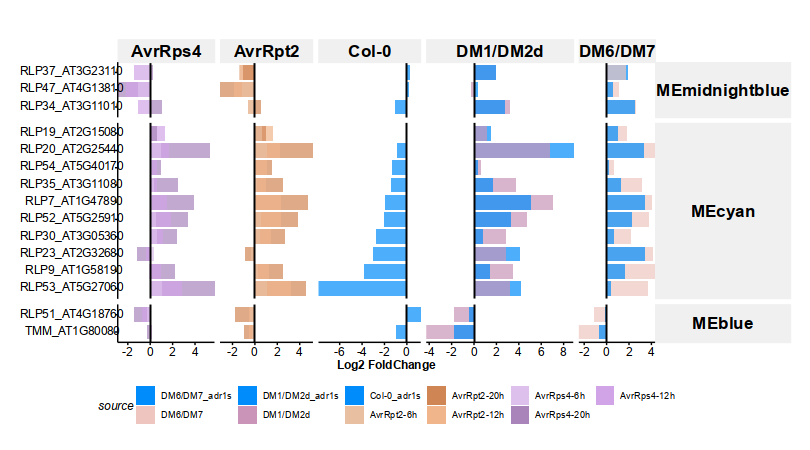

In [66]:
width_ = 8.1
height_ = 4.5
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 100)

bar_LRR <- plot_NLRs_overlay_bar(Res = Res_LRRs %>% filter(GeneFamily %>% str_detect('RLP')) , 
                      Res_base = Res_LRRs_Col  %>% filter(GeneFamily %>% str_detect('RLP')) , 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0))  # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_LRR
bar_LRR %>% ggsave(file = paste0("./plots/RLP_overlap_bar_LRRs", Sys.time(), ".pdf"), width = width_ , height = height_)

In [67]:
Res_LRRs %>% filter(GeneFamily %>% str_detect('RLK')) %>% pull(AGI) %>% unique %>% length

[1] 88

In [68]:
filtered_RLKs <- Res_LRRs %>% filter(GeneFamily %>% str_detect('RLK')) %>% filter(abs(log2FC) > 2) %>% pull(AGI) %>% unique 

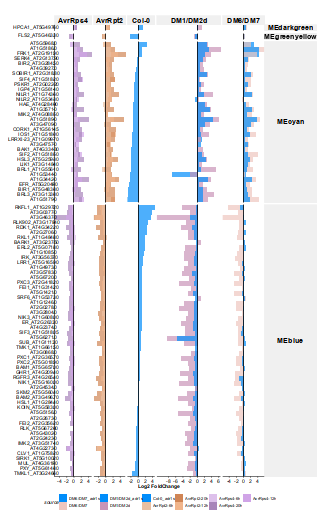

In [69]:
width_ = 8.1
height_ = 13
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 40)

bar_LRR <- plot_NLRs_overlay_bar(Res = Res_LRRs %>% filter(GeneFamily %>% str_detect('RLK')) , 
                      Res_base = Res_LRRs_Col  %>% filter(GeneFamily %>% str_detect('RLK')) , 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0))  # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_LRR
bar_LRR %>% ggsave(file = paste0("./plots/all_RLK_overlap_bar_LRRs", Sys.time(), ".pdf"), width = width_ , height = height_)

In [70]:
Res_LRRs %>% filter(AGI %in% filtered_RLKs) %>% names

[1] "AGI"                      "log2FC"                  
 [3] "source"                   "gene_name.x"             
 [5] "label_color_markdown"     "connectivity_rowSums_adj"
 [7] "module"                   "gene_name.y"             
 [9] "DM6.DM7"                  "DM1.DM2d"                
[11] "DM10.DM11"                "AvrRpt2.6h"              
[13] "AvrRpt2.12h"              "AvrRpt2.20h"             
[15] "AvrRps4.6h"               "AvrRps4.12h"             
[17] "AvrRps4.20h"              "DM1.DM2d_adr1s"          
[19] "Col.0_adr1s"              "DM6.DM7_adr1s"           
[21] "GeneFamily"               "category"

In [71]:
Res_LRRs %>% filter(AGI %in% filtered_RLKs)%>% filter(module == 'MEblue') %>% 
     select(-log2FC, - source, - category) %>% distinct %>% filter(`DM1.DM2d` < -1, `Col.0_adr1s` > 1) %>%
    arrange(`DM1.DM2d`)
    write.csv('./WGCNA_output_all/filtered_RLKs.csv')

AGI,gene_name.x,label_color_markdown,connectivity_rowSums_adj,module,gene_name.y,DM6.DM7,DM1.DM2d,DM10.DM11,AvrRpt2.6h,AvrRpt2.12h,AvrRpt2.20h,AvrRps4.6h,AvrRps4.12h,AvrRps4.20h,DM1.DM2d_adr1s,Col.0_adr1s,DM6.DM7_adr1s,GeneFamily
<chr>,<chr>,<chr>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AT3G46370,AT3G46370,AT3G46370,1194.783,MEblue,AT3G46370,-5.8125359,-11.268321,-5.458798,-0.70893654,-3.0165938,-3.346239,-0.209352275,-2.21210004,-5.4908432,-2.00893139,3.518624,-0.016426795,LRR-RLKs
AT4G34220,RDK1,RDK1_AT4G34220,1785.127,MEblue,RDK1,-1.1580261,-4.291683,-4.812237,-0.32016006,-0.6873265,-2.732554,0.011329427,-0.80279923,-2.0870762,-1.21426130,2.421090,0.082980446,LRR-RLKs
AT3G57830,AT3G57830,AT3G57830,1742.369,MEblue,AT3G57830,-2.5900025,-4.222950,-4.250898,-0.04030363,-0.4594634,-1.729938,-0.005668448,-0.41266978,-1.1656247,-1.36699194,1.064622,-0.313985727,LRR-RLKs
AT1G29720,RKFL1,RKFL1_AT1G29720,1428.724,MEblue,RKFL1,-4.2971752,-4.010906,-2.564544,-0.97946845,-1.5560006,-2.430114,-0.488848013,-1.03203470,-1.5638814,-0.23773389,4.635595,-0.946509988,LRR-RLKs
AT1G49730,AT1G49730,AT1G49730,1760.735,MEblue,AT1G49730,-0.7933826,-3.458247,-4.694298,-0.20343115,-0.6366393,-1.707296,-0.324714927,-0.68393828,-1.5017014,-0.10208296,1.088949,0.298608931,LRR-RLKs
AT3G56370,IRK,IRK_AT3G56370,1797.980,MEblue,IRK,-2.2407005,-3.454642,-4.728233,-0.39513624,-0.5014634,-1.904685,-0.051185071,-0.45075849,-1.3281403,-0.85870862,1.258698,0.141033473,LRR-RLKs
AT1G10850,AT1G10850,AT1G10850,1795.459,MEblue,AT1G10850,-1.6066965,-3.448600,-3.183697,-0.28667959,-0.6697962,-1.622058,-0.063411079,-0.43837142,-1.0092965,-0.47286835,1.439625,0.126131447,LRR-RLKs
AT5G07180,ERL2,ERL2_AT5G07180,1609.281,MEblue,ERL2,-1.1532441,-3.283625,-4.774068,-0.23398540,-0.3275654,-1.354456,-0.076809402,-0.19271201,-0.8093199,-0.08700539,1.785414,0.549360322,LRR-RLKs
AT3G17840,RLK902,RLK902_AT3G17840,1766.769,MEblue,RLK902,-1.2411276,-2.993081,-3.769445,-0.37962171,-0.7825056,-1.558895,-0.068039359,-0.76576499,-1.1392992,-0.62253049,2.726746,0.432569784,LRR-RLKs


"","x"
"1","./WGCNA_output_all/filtered_RLKs.csv"


In [72]:
Res_LRRs %>% filter(AGI %in% filtered_RLKs)%>% filter(module == 'MEblue') %>% 
     select(-log2FC, - source, - category) %>% distinct %>% filter(`DM1.DM2d` < -1, `Col.0_adr1s` > 1) %>%
    arrange(`DM1.DM2d`) %>%
    write.csv('./WGCNA_output_all/filtered_RLKs.csv')

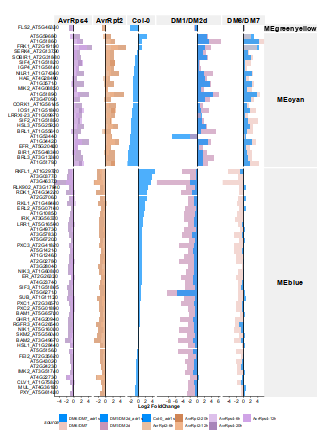

In [73]:
width_ = 8.1
height_ = 11
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 40)

bar_LRR <- plot_NLRs_overlay_bar(Res = Res_LRRs %>% filter(AGI %in% filtered_RLKs) , 
                      Res_base = Res_LRRs_Col  %>% filter(AGI %in% filtered_RLKs) , 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0))  # Make facet labels horizontal)
# Save the final plot to a PDF file
bar_LRR
bar_LRR %>% ggsave(file = paste0("./plots/RLK_overlap_bar_LRRs", Sys.time(), ".pdf"), width = width_ , height = height_)

In [74]:
Res_LRRs %>% pull(AGI) %>% unique %>% length

[1] 103

In [75]:
filtered_LRRs <- Res_LRRs  %>% filter(abs(log2FC) > 3) %>% pull(AGI) %>% unique 
filtered_LRRs <- c(filtered_LRRs, "AT3G23110")
filtered_LRRs %>% length

[1] 50

In [76]:
Res_LRRs %>% pull(AGI) %>% unique %>% length

[1] 103

In [77]:
library(glue)
library(ggtext)

generate_Res_color <- function(cols_text, Res) {
  cols_text_2 <- cols_text %>% as.data.frame() %>%  tibble::rownames_to_column("Class") %>% rename(label_color = 2)

  Res <- Res %>% 
      mutate(plot_label = paste0(Symbol, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) %>% 
      left_join(cols_text_2, by = 'Class')  

  # Extract plot_label and label_color from Res_NLRs and
  plot_label_color <- Res %>% select(plot_label, label_color)

  # Create a named list with label_color as content and plot_label as names
  color_list <- setNames(as.list(plot_label_color$label_color), plot_label_color$plot_label)

  Res_color <- Res %>% mutate(label_color_markdown =
          glue("<i style='color: {color_list[plot_label]}'>{plot_label}</i>")) 

  return(Res_color)
}


In [78]:
Res_LRRs %>% names

[1] "AGI"                      "log2FC"                  
 [3] "source"                   "gene_name.x"             
 [5] "label_color_markdown"     "connectivity_rowSums_adj"
 [7] "module"                   "gene_name.y"             
 [9] "DM6.DM7"                  "DM1.DM2d"                
[11] "DM10.DM11"                "AvrRpt2.6h"              
[13] "AvrRpt2.12h"              "AvrRpt2.20h"             
[15] "AvrRps4.6h"               "AvrRps4.12h"             
[17] "AvrRps4.20h"              "DM1.DM2d_adr1s"          
[19] "Col.0_adr1s"              "DM6.DM7_adr1s"           
[21] "GeneFamily"               "category"

In [79]:
cols_text_LRRs <- c( 'LRR-RLKs' =  "#386cb0",
                 'LRR-RLPs' = "#984ea3" )
Res_LRRs_color <- generate_Res_color(cols_text_LRRs, Res_LRRs %>% filter(AGI %in% filtered_LRRs) %>% dplyr::rename('Symbol' = 'gene_name.x', 'Class' = 'GeneFamily') )

In [80]:
Res_LRRs_color_Col <- Res_LRRs_color %>% filter(category =='Col-0') %>% arrange(log2FC)

In [81]:
Res_LRRs_color %>% pull(AGI) %>% unique %>% length

[1] 50

In [82]:
Res_LRRs_color %>% saveRDS('./Rdata/Res_LRRs_color.rds')

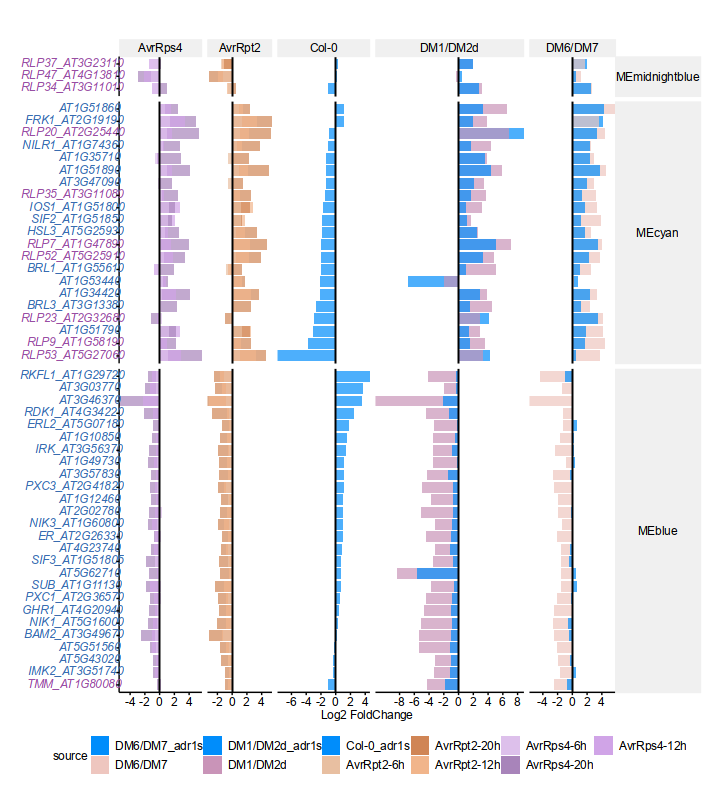

In [83]:
width_ = 7.2
height_ = 8
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 100)

bar_NLRs_plot <- plot_NLRs_overlay_bar(Res = Res_LRRs_color , 
                      Res_base = Res_LRRs_color_Col, 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0)) +
                        theme_custom()# Make facet labels horizontal)
# Save the final plot to a PDF file
bar_NLRs_plot
bar_NLRs_plot %>% ggsave(file = paste0("./plots/overlap_bar_LRRs", Sys.time(), ".pdf"),
                         width = width_ , height = height_)

In [84]:
Res_LRRs_color %>% filter(AGI == 'AT5G62710', source %>% str_detect('DM2d'))

AGI,log2FC,source,Symbol,label_color_markdown,connectivity_rowSums_adj,module,gene_name.y,DM6.DM7,DM1.DM2d,⋯,AvrRps4.6h,AvrRps4.12h,AvrRps4.20h,DM1.DM2d_adr1s,Col.0_adr1s,DM6.DM7_adr1s,Class,category,plot_label,label_color
<chr>,<dbl>,<fct>,<chr>,<glue>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AT5G62710,-8.252634,DM1/DM2d,AT5G62710,<i style='color: #386cb0'>AT5G62710</i>,1602.185,MEblue,AT5G62710,-1.508787,-8.252634,⋯,-0.1824201,-0.3516651,-1.422403,-5.51817,0.6270135,0.3622776,LRR-RLKs,DM1/DM2d,AT5G62710,#386cb0
AT5G62710,-5.518170,DM1/DM2d_adr1s,AT5G62710,<i style='color: #386cb0'>AT5G62710</i>,1602.185,MEblue,AT5G62710,-1.508787,-8.252634,⋯,-0.1824201,-0.3516651,-1.422403,-5.51817,0.6270135,0.3622776,LRR-RLKs,DM1/DM2d,AT5G62710,#386cb0


In [85]:
Res_LRRs_color %>% group_by(source) %>% summarise(mean_log2FC = mean(log2FC))

source,mean_log2FC
<fct>,<dbl>
DM1/DM2d,-0.57657580
DM1/DM2d_adr1s,0.55028291
DM6/DM7,0.45184841
DM6/DM7_adr1s,0.97640276
Col-0_adr1s,-0.26492111
AvrRpt2-6h,-0.08689517
AvrRpt2-12h,0.15769035
AvrRpt2-20h,0.18269080
AvrRps4-6h,0.08078291


In [86]:
Res_combined %>% saveRDS('./Rdata/Res_combined.rds')

In [87]:
TPRs <- c( 'AT3G16830', 'AT1G80490', 'AT3G16830') #topless and homologs

In [88]:
Res_combined %>% filter(AGI %in% TPRs) %>% left_join(map_id_name, by = c('AGI' = 'gene_id')) 

AGI,log2FC,source,gene_name
<chr>,<dbl>,<fct>,<chr>
AT1G80490,0.22884092,DM6/DM7,TPR1
AT3G16830,0.09483410,DM6/DM7,TPR2
AT1G80490,0.95500010,DM1/DM2d,TPR1
AT3G16830,0.97558422,DM1/DM2d,TPR2
AT1G80490,0.43272589,DM10/DM11,TPR1
AT3G16830,0.91846050,DM10/DM11,TPR2
AT1G80490,-0.06786583,AvrRpt2-6h,TPR1
AT3G16830,-0.12713896,AvrRpt2-6h,TPR2
AT1G80490,0.02095594,AvrRpt2-12h,TPR1


### DOFs family

In [89]:
#read excel
DOF_family <- readxl::read_excel('./refs/DOFs_Ath.xlsx')

In [122]:
Res_DOFs <- Res_combined %>% filter(AGI %in% DOF_family$gene_id) %>% left_join(map_id_name, by = c('AGI' = 'gene_id')) %>% mutate(module = 'none', category = source, label_color_markdown = paste0(gene_name, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) 

In [123]:
plot_overlay_bar_whole_family <- function(Res, Res_base, alpha = 0.6, facet_col = "category") {
  library(purrr)
  library(rlang) # for sym()
  # Convert facet string to symbol
  facet_col <- sym(facet_col)
  
  # Step 1: Split the dataframe based on log2FoldChange
  over0 <- Res %>% filter(log2FC > 0) 
  below0 <- Res %>% filter(log2FC <= 0)
  
  # Step 2: Create a list to store the dataframes for each layer
  layers <- list()
  
  # Step 3: Iterate until there are no rows left in over0 and below0
  layer_num <- 1
  while (nrow(over0) > 0 || nrow(below0) > 0) {
    max_over0 <- over0 %>% group_by(AGI) %>% slice_max(log2FC)
    min_below0 <- below0 %>% group_by(AGI) %>% slice_min(log2FC)
    over0 <- suppressMessages(anti_join(over0, max_over0))
    below0 <- suppressMessages(anti_join(below0, min_below0))
    layer <- bind_rows(max_over0, min_below0)
    layers[[layer_num]] <- layer
    layer_num <- layer_num + 1
  }
  
  # Step 4: Use the layers list to add new layers to the ggplot using geom_bar
  bar_base <- Res %>%
    ggplot(aes(x = reorder(label_color_markdown, log2FC), y = log2FC, label = label_color_markdown)) +
    labs(y = "Log2 FoldChange") +
    coord_flip() +
    guides(fill = guide_legend(reverse = TRUE, nrow = 2)) +
    scale_y_continuous(breaks = c(-8,-6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16),
                       expand = c(0, 0)) +
    scale_fill_manual(values = bar_colors)+
    theme_Publication() +
    theme(axis.text = element_text(size = 8),
          axis.title = element_text(size = 8),
          axis.title.y = element_blank()) +
    theme(text = element_text(size = 8, family = "Arial"), 
          strip.text = element_text(size = 12)) +
    facet_grid(cols = vars(!!facet_col), scales = "free", space = "free") + # only facet by column
    theme(axis.text.y = element_markdown()) +
    geom_bar(data = Res_base,
             position="identity", stat='identity', aes(fill=source), width = .8, alpha = 0) 
  
  bar_plot <- reduce(layers, function(plot, layer) {
    plot +
      geom_bar(data = layer,
               position = "identity",
               stat = 'identity',
               aes(fill = source),
               width = .8,
               alpha = alpha)
  }, .init = bar_base)
  
  bar_plot <- bar_plot + geom_hline(yintercept=0, color = "black", size=0.5)
  
  # Return the final plot
  return(bar_plot)
}

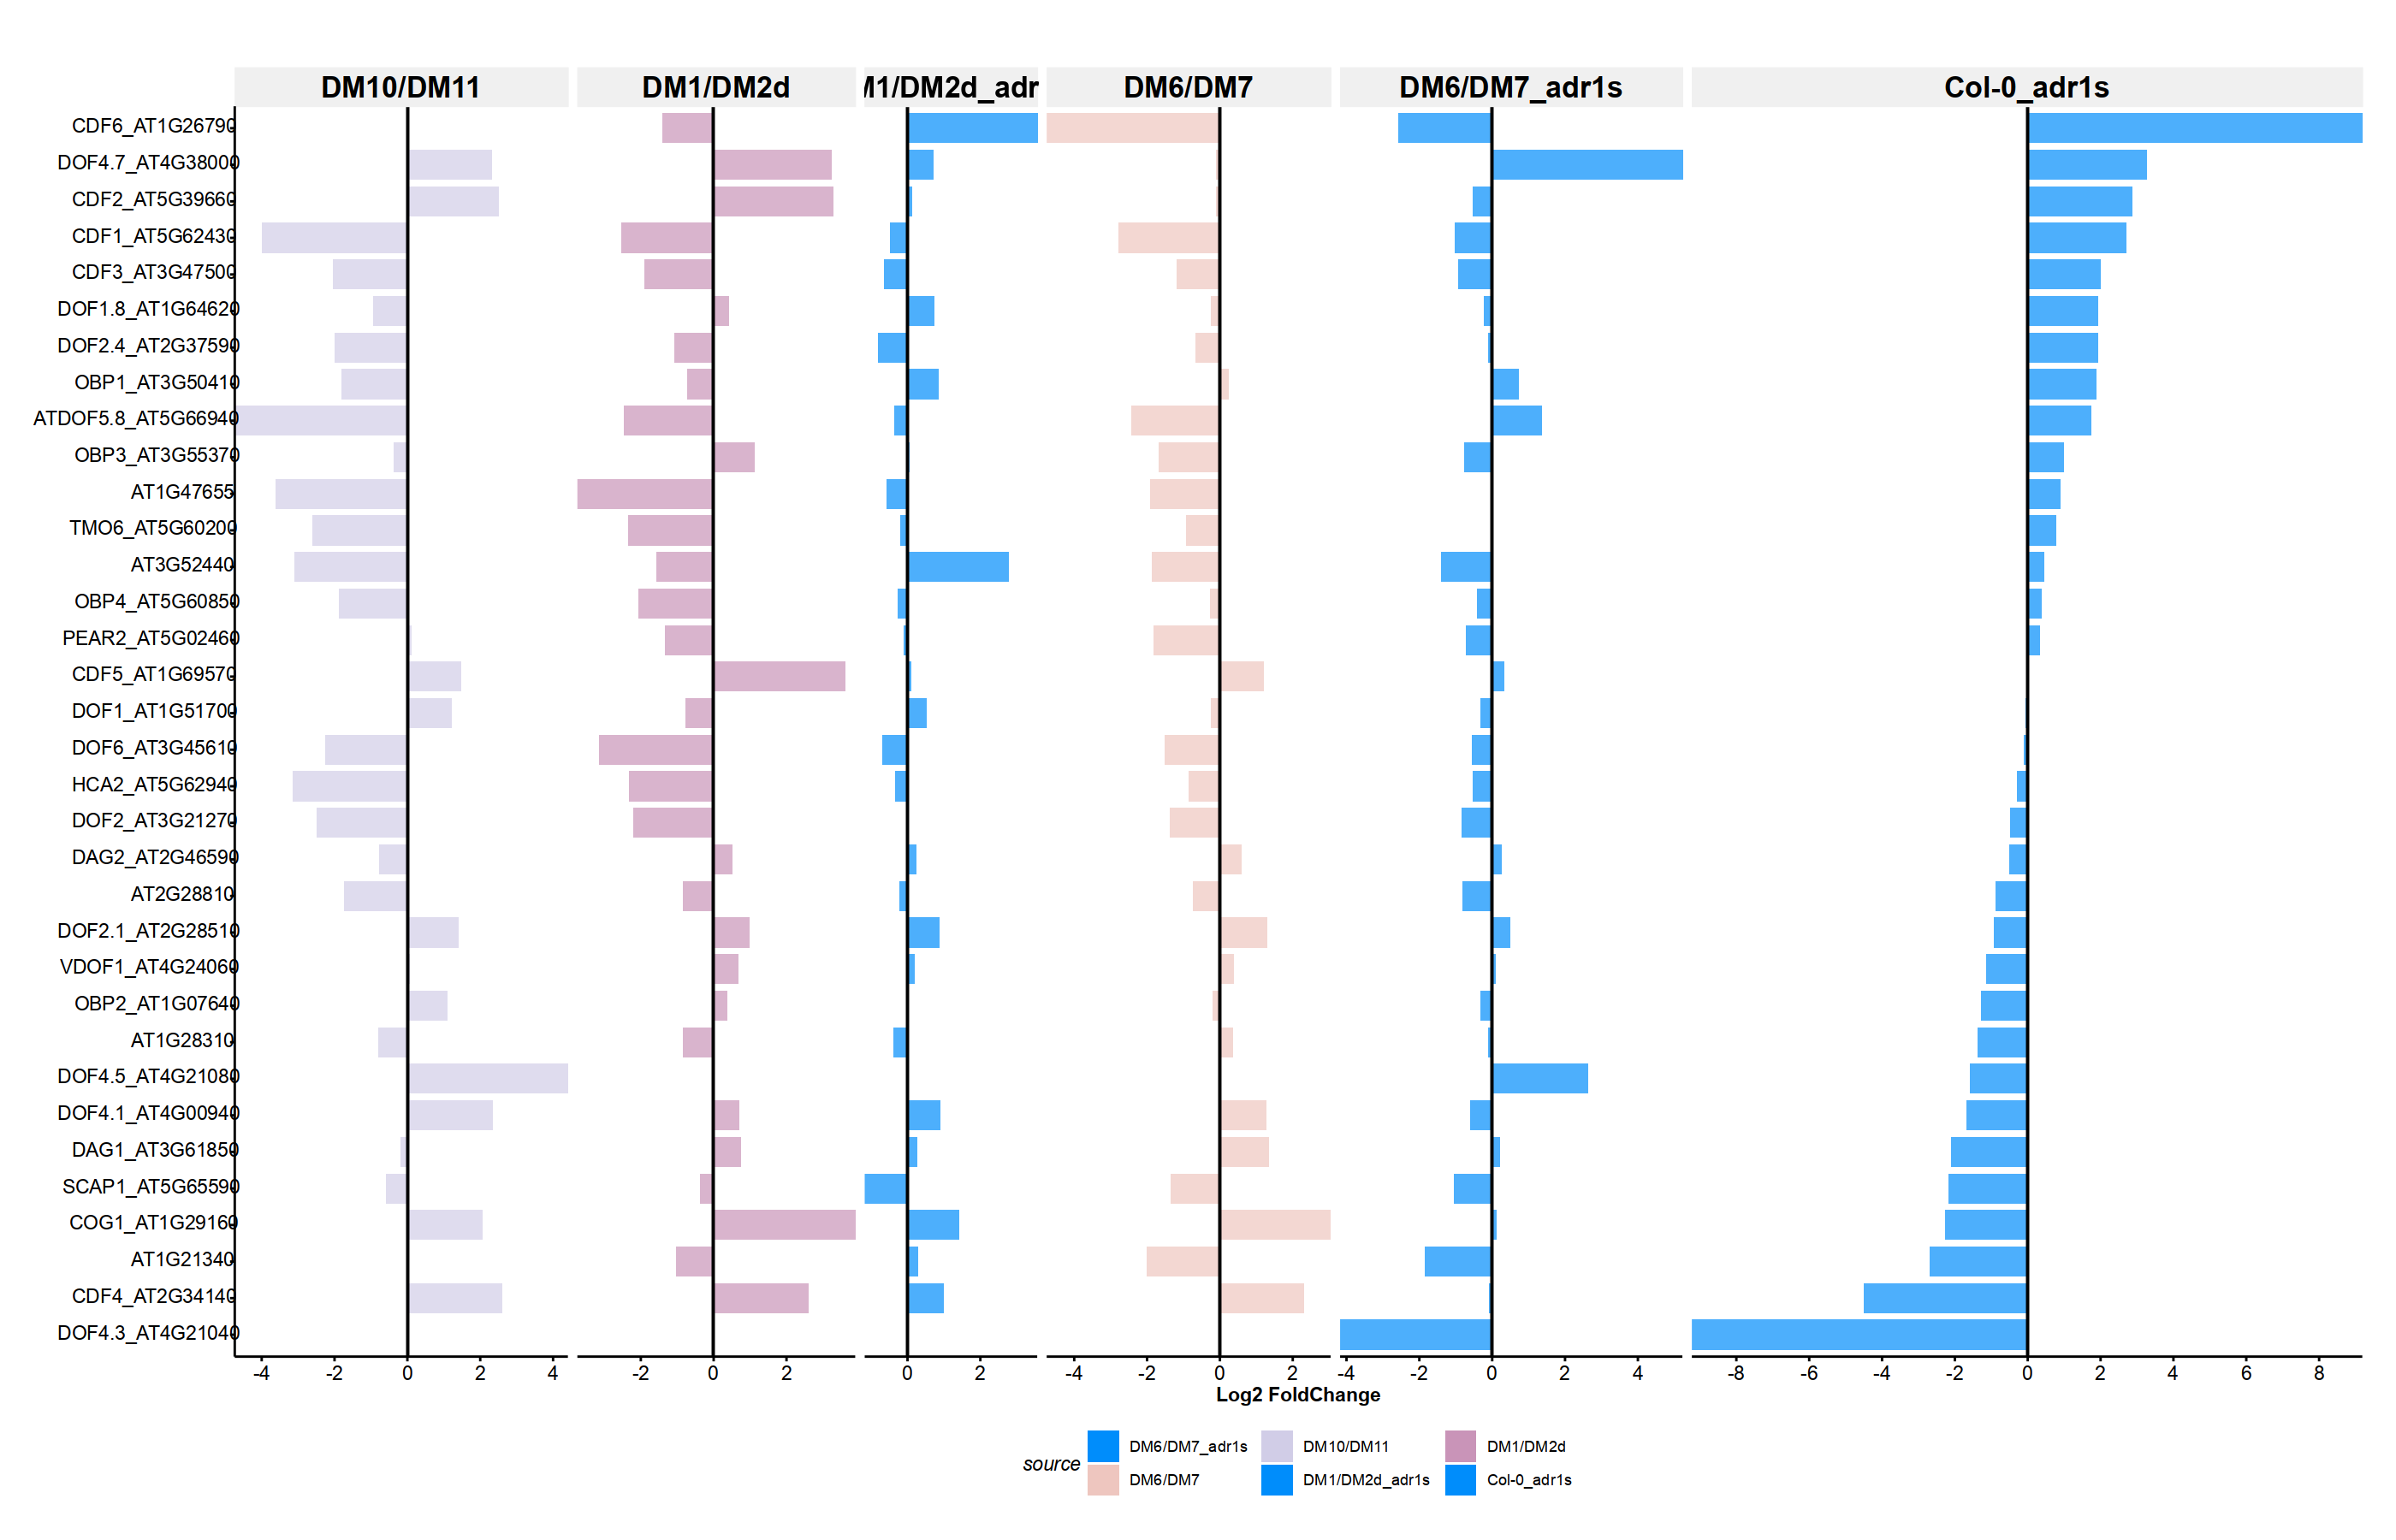

In [124]:
width_ = 14
height_ = 9
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 200)

plot_overlay_bar_whole_family(
  Res = Res_DOFs %>% filter(source %>% str_detect('^Avr', negate = T)),
  Res_base = Res_DOFs %>% filter(source == 'Col-0_adr1s'),
  facet_col = "category", 
  alpha = 0.7
)

ggsave('./plots/DOFs.pdf', width = width_, height = height_)

### WRKY 

In [93]:
WRKY_family <- readxl::read_excel('./refs/WRKY_Ath.xlsx')

In [100]:
WRKY_family <- WRKY_family %>% 
  dplyr::rename('AGI' = 'Locus ID') %>% 
  filter(AGI %>% str_detect('^At')) %>%
  mutate(AGI = toupper(AGI))

In [103]:
Res_WRKYs <- Res_combined %>% filter(AGI %in% WRKY_family$AGI) %>% left_join(map_id_name, by = c('AGI' = 'gene_id')) %>% mutate(module = 'none', category = source, label_color_markdown = paste0(gene_name, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') ) 

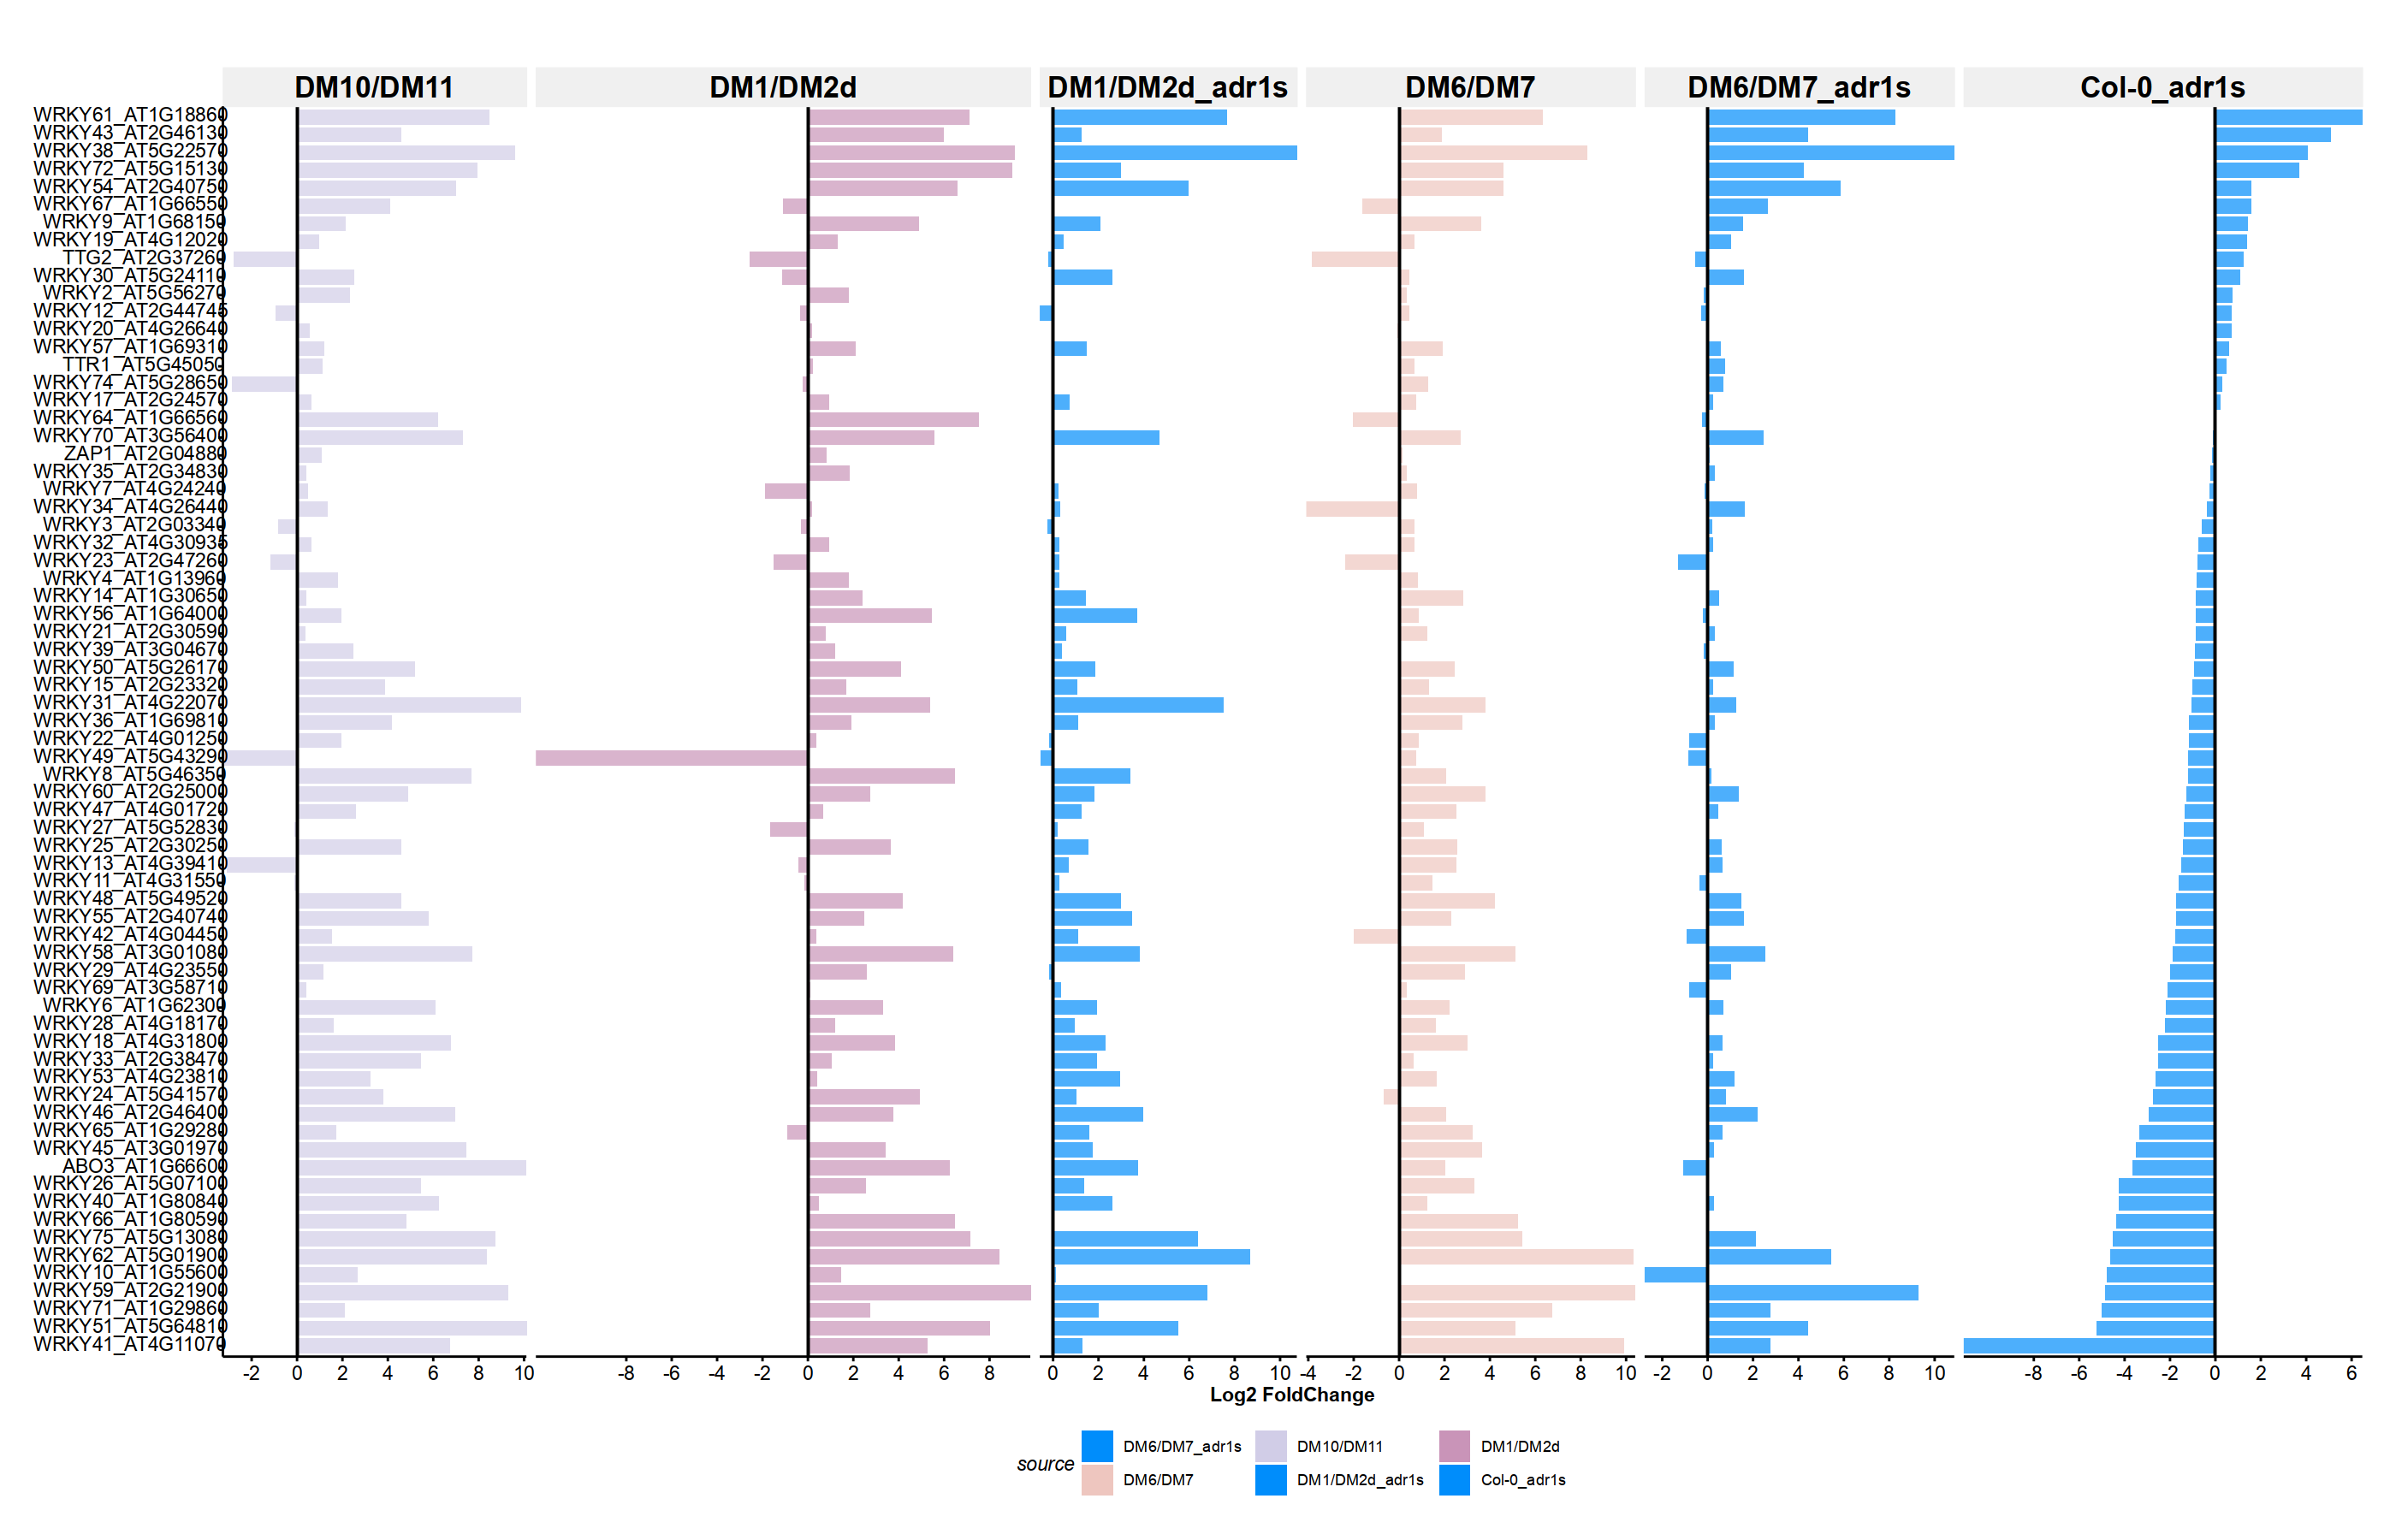

In [119]:
plot_overlay_bar_whole_family(
  Res = Res_WRKYs %>% filter(source %>% str_detect('^Avr', negate = T)),
  Res_base = Res_WRKYs %>% filter(source == 'Col-0_adr1s'),
  facet_col = "category", 
  alpha = 0.7
)

In [ ]:
Res_DOFs %>% filter(source %>% str_detect('DM')) %>% arrange(source, gene_name)

In [ ]:
width_ = 14
height_ = 8
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 200)

plot_NLRs_overlay_bar2(Res = Res_DOFs,
                      Res_base = Res_DOFs %>% filter(source == 'Col-0_adr1s'), 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0)) 

In [ ]:
eti_markers <- c("AT2G14610", "AT5G13320", "AT1G19250", "AT3G48090", 
                 "AT3G52430", "AT3G56400", "AT4G39030", "AT1G64280", 
                 "AT5G41750", "AT4G37370", "AT1G75040", "AT2G35980", 
                 "AT4G23550", "AT2G29350", "AT2G47730", "AT5G47910", 
                 "AT2G19190")

In [ ]:
Res_ETI <- Res_combined %>% filter(AGI %in% eti_markers) %>% left_join(map_id_name, by = c('AGI' = 'gene_id')) %>% mutate(module = 'none', category = source, label_color_markdown = paste0(gene_name, '_', AGI) %>% str_remove('AT\\d{1}G\\d{5}_') )

In [ ]:
width_ = 14
height_ = 10
options(repr.plot.width= width_ , repr.plot.height= height_ , repr.plot.res = 200)

plot_NLRs_overlay_bar(Res = Res_ETI,
                      Res_base = Res_TPRs %>% filter(source == 'Col-0_adr1s'), 
                      facet_row = "module", alpha = 0.7) + theme( strip.text.y = element_text(angle = 0)) 

In [ ]:
TIR_containing <- NLRs_and_TIRs %>% dplyr::filter(Class %>% str_detect('TIR'))
TIR_containing %>% saveRDS('./Rdata/TIR_containing.rds')

In [ ]:
TIR_containing

In [ ]:
nlp20_1h <- readxl::read_excel('./Ding2021_Yueling_Zhang_TIR_Boost/boost_TIR_headeer_revised.xlsx', sheet = 'nlp20_1h') %>% mutate_all(~str_trim(.)) %>% dplyr::select(-Description)  %>% filter(`Gene ID` != 'NA')
flg22_30min <- readxl::read_excel('./Ding2021_Yueling_Zhang_TIR_Boost/boost_TIR_headeer_revised.xlsx', sheet = 'flg22_30min') %>% mutate_all(~str_trim(.)) %>% dplyr::select(-Description)  %>% filter(`Gene ID` != 'NA')
nlp20_6h <- readxl::read_excel('./Ding2021_Yueling_Zhang_TIR_Boost/boost_TIR_headeer_revised.xlsx', sheet = 'nlp20_6h') %>% mutate_all(~str_trim(.)) %>% dplyr::select(-Description) %>% filter(`Gene ID` != 'NA')

In [ ]:
flg22_30min%>% nrow()
nlp20_6h %>% nrow
nlp20_1h %>% nrow

In [ ]:
nlp20_1h

In [ ]:
Res_combined %>% pull(source) %>% unique

In [ ]:
Res_TIR_containing <-  Res_combined %>% filter(AGI %in% TIR_containing$AGI)

In [ ]:
Res_TIR_containing %>% saveRDS('./Rdata/Res_TIR_containing.rds')

In [ ]:
DM_up_TIR_containing <- Res_TIR_containing %>% filter(source %in% c('DM10/DM11', 'DM1/DM2d', 'DM6/DM7')) %>% 
    filter(log2FC > 2) %>% pull(AGI) %>% unique 

In [ ]:
Pathogen_up_TIR_containing <- Res_TIR_containing %>% filter(source %in% c('AvrRpt2-6h','AvrRpt2-12h','AvrRpt2-20h','AvrRps4-6h','AvrRps4-12h','AvrRps4-20h')) %>% filter(log2FC > 2) %>% pull(AGI) %>% unique

In [ ]:
PTI_up_TIR_containing <- nlp20_1h %>%  rbind(nlp20_6h) %>% rbind(flg22_30min) %>% pull(`Gene ID`) %>% unique 

In [ ]:
up_TIR_containing <- list('DM' = DM_up_TIR_containing,'Pathogen' = Pathogen_up_TIR_containing, 'PTI' = PTI_up_TIR_containing)

In [ ]:
up_TIR_containing %>% saveRDS('./Rdata/up_TIR_containing.rds')

In [ ]:
library(VennDiagram)
## https://wemp.app/posts/4444f152-32e0-4618-89a4-66a146945410
plot_venn <- function (genes_list, main_title = '') {
    venn.diagram(genes_list, 
                          fill = c( "#A58AFF", '#D08555', '#4DAFFC'),
                  alpha = c(0.5, 0.5,0.5), cat.cex = 1, ## Vector giving the size for each category name
                  cex=1,filename=NULL,  cat.dist = 0.08, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Arial",
                              cat.fontfamily = "Arial",
                    main =  main_title,
                        main.pos = c(0.5, 1), main.fontface = "plain",
                    main.fontfamily = "Arial", main.col = "black",
                    main.cex = 1, fontfamily = 'Arial',
                  ggplot = T) 
}

In [ ]:
up_TIR_containing

In [ ]:
TIR_containing

In [ ]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res = 100)

up_TIR_containing_plot <- plot_venn(up_TIR_containing,'up_TIR_containing')
grid.newpage()
grid.draw(up_TIR_containing_plot)

In [ ]:
c(up_TIR_containing[1],up_TIR_containing[3])

In [ ]:
up_TIR_containing[[1]] %>% length
up_TIR_containing[[3]] %>% length

In [ ]:


PTI_DM <- venn.diagram(c(up_TIR_containing[1],up_TIR_containing[3]), 
                          fill = c( "#A58AFF", '#D08555'),
                  alpha = c(0.5, 0.5), cat.cex = 1, ## Vector giving the size for each category name
                  cex=1,filename=NULL,  cat.dist = 0.08, # set name distanc to set
                  lty = 'blank', sub.fontfamily = "Arial",
                              cat.fontfamily = "Arial",
                    main =  'PTI DM',
                        main.pos = c(0.5, 1), main.fontface = "plain",
                    main.fontfamily = "Arial", main.col = "black",
                    main.cex = 1, fontfamily = 'Arial',
                  ggplot = T) 

grid.newpage()
grid.draw(PTI_DM)

In [ ]:

pdf(file="./plots/TIRs_in_DM_PTI.pdf", width = 2.7, height = 2.7)
grid.newpage()
grid.draw(PTI_DM)
dev.off()

In [ ]:
extract_genes_info <- function(genes_list) {
  # Calculate the intersection (overlaps) among all lists
  total_overlap <- Reduce(intersect, genes_list)

  # Calculate pairwise intersections, excluding the total overlap
  pairwise_intersections <- list()
  for (i in 1:(length(genes_list)-1)) {
    for (j in (i+1):length(genes_list)) {
      key <- paste(names(genes_list)[c(i, j)], collapse = "+")
      pairwise_overlap <- intersect(genes_list[[i]], genes_list[[j]])
      pairwise_intersections[[key]] <- setdiff(pairwise_overlap, total_overlap)
    }
  }

  # Calculate unique elements for each list
  unique_elements <- lapply(names(genes_list), function(name) {
    other_lists <- genes_list[names(genes_list) != name]
    unique_to_list <- Reduce(setdiff, c(list(genes_list[[name]]), other_lists))
    return(unique_to_list)
  })
  names(unique_elements) <- names(genes_list)

  # Return a list containing the overlaps and unique elements
  return(list(total_overlap = total_overlap,
              pairwise_intersections = pairwise_intersections,
              unique = unique_elements))
}

# Example usage with your up_TIR_containing list
genes_info <- extract_genes_info(up_TIR_containing)


In [ ]:
genes_info

In [ ]:
genes_info 

In [ ]:
genes_info %>% saveRDS('./Rdata/TIR_venn_genes_info.rds')

In [ ]:
#print current dir
getwd()

In [ ]:
create_genes_table <- function(genes_info) {
  # Initialize an empty data frame for the results
  genes_table <- data.frame(AGI = character(), Category = character(), stringsAsFactors = FALSE)

  # Process total overlap
  genes_table <- rbind(genes_table, data.frame(AGI = genes_info$total_overlap, Category = 'Total Overlap'))

  # Process pairwise intersections
  for (pair in names(genes_info$pairwise_intersections)) {
    genes_table <- rbind(genes_table, data.frame(AGI = genes_info$pairwise_intersections[[pair]], Category = pair))
  }

  # Process unique genes
  for (unique_list in names(genes_info$unique)) {
    category_name <- paste(unique_list, "Unique", sep = " ")
    genes_table <- rbind(genes_table, data.frame(AGI = genes_info$unique[[unique_list]], Category = category_name))
  }

  return(genes_table)
}

# Use the function to create the table
genes_table <- create_genes_table(genes_info)


In [ ]:
genes_table <- genes_table %>% left_join(map_id_name, by =c('AGI' = 'gene_id')) %>% left_join(NLRs_and_TIRs, by = c('AGI' = 'AGI')) %>% left_join(updated_NLRs_table, by = c('AGI' = 'AGI')) %>% mutate(gene_name2 = coalesce(Primary.Gene.Symbol, gene_name, Symbol)) %>% dplyr::select(AGI,gene_name2, , Class, Category) %>% 
    dplyr::rename('gene_name' = 'gene_name2') 

In [ ]:
genes_table

In [ ]:
genes_table %>% write.csv('./tables/up_TIR_containing.csv', row.names = F)